In [1]:
import pandas as pd
from db_utils import RDSDatabaseConnector, LocalDataLoader

def load_data():
    rds_connector = RDSDatabaseConnector()
    credentials = rds_connector.load_database_credentials()

    query = "SELECT * FROM loan_payments"
    data_df = rds_connector.extract_data_as_dataframe(query)

    file_path = "loan_payments_data.csv"  # Consider using a more dynamic file path
    rds_connector.save_data_to_csv(data_df, file_path)

    loaded_data = LocalDataLoader.load_data_from_csv(file_path)

    return loaded_data

# Run the function
data = load_data()
data.head()

Data saved to loan_payments_data.csv successfully.


,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [2]:
# Section 3: Apply Data Transformations
from main_script import DataTransform

def apply_data_transformations(data):
    transformer = DataTransform()
    numeric_columns = ['loan_amount', 'funded_amount', 'annual_inc', 'dti']
    date_columns = ['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
    data = transformer.convert_to_numeric(data, numeric_columns)
    data = transformer.convert_to_datetime(data, date_columns)

    return data

# Run the function
transformed_data = apply_data_transformations(data)
transformed_data.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL


In [3]:
# Section 4: Display Column Information
def display_column_info(df, column):
    """
    Display information about a specific column.

    Parameters:
    - df: DataFrame
    - column: str, column name

    Prints:
    - Data type, number of unique values, and top 5 values in the specified column.
    """
    print(f"Column: {column}")
    print(f"Data Type: {df[column].dtype}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    print(f"Top 5 Values: {df[column].value_counts().head().index.tolist()}")

# Run the function
display_column_info(transformed_data, 'loan_amount')

Column: loan_amount
Data Type: int64
Number of Unique Values: 1083
Top 5 Values: [10000, 12000, 15000, 20000, 5000]


DataFrame Shape: (54231, 43)
DataFrame Shape: (54231, 43)


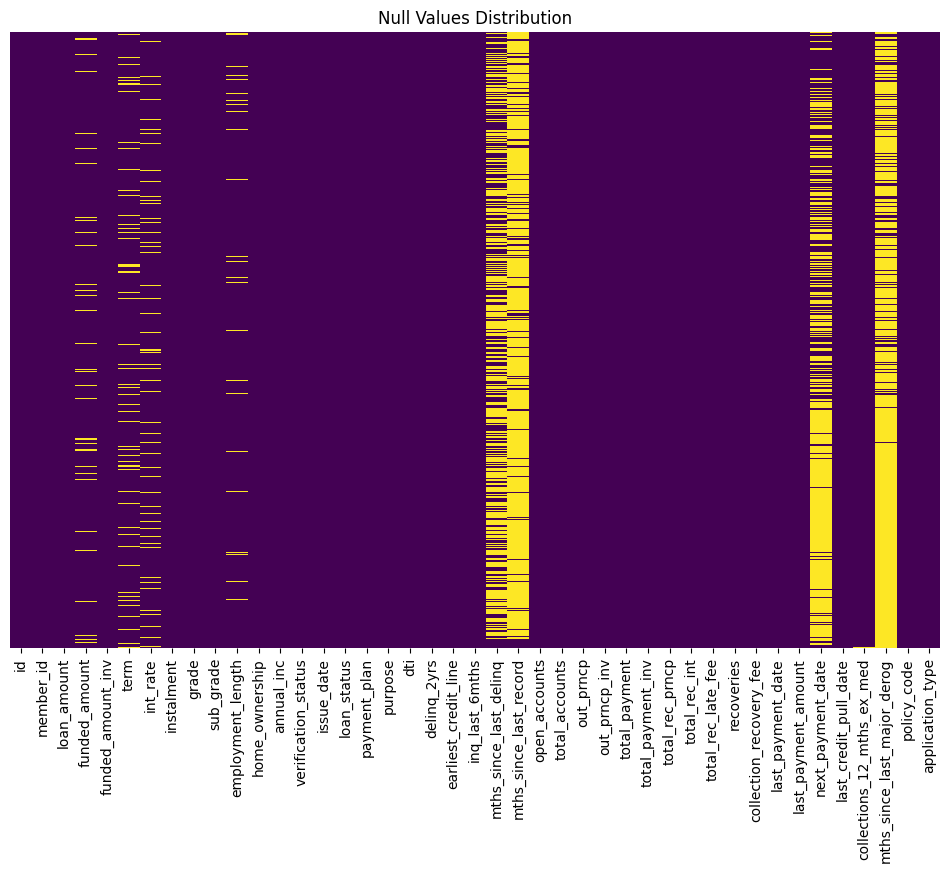

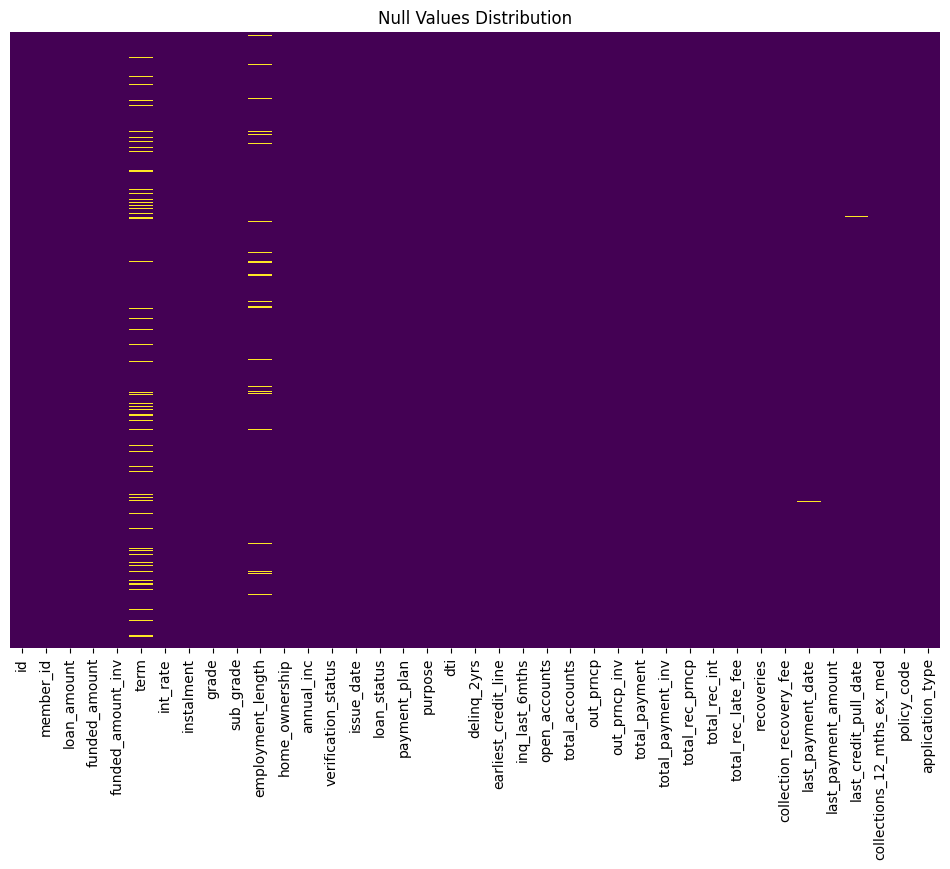

In [4]:
from db_utils import RDSDatabaseConnector, LocalDataLoader, DataFrameInfo, DataTransform,Plotter,DataFrameTransform


# Load data from the database
rds_connector = RDSDatabaseConnector()
query = "SELECT * FROM loan_payments"  # Replace with your actual table name
data_df = rds_connector.extract_data_as_dataframe(query)

# Display basic information about the DataFrame
DataFrameInfo.describe_columns(data_df)
DataFrameInfo.print_shape(data_df)

# Extract statistical values
DataFrameInfo.extract_statistics(data_df)

# Count distinct values in categorical columns
DataFrameInfo.count_distinct_values(data_df)

DataFrameInfo.count_null_values(data_df)

df = pd.read_csv("loan_payments_data.csv")

# Create an instance of DataFrameInfo
df_info = DataFrameInfo()

# Example usage
df_info.describe_columns(df)
df_info.extract_statistics(df)
df_info.count_distinct_values(df)
df_info.print_shape(df)
df_info.count_null_values(df)

# Instantiate the classes
transformer = DataFrameTransform()

# Assuming you have loaded your DataFrame 'df' before this point
# Plot NULL distribution
Plotter.plot_null_distribution(df)

# Drop columns with a high percentage of NULLs
df = transformer.drop_columns_with_nulls(df)

# Impute missing values
df = transformer.impute_missing_values(df)

# Plot NULL distribution after imputation
Plotter.plot_null_distribution(df)




<Figure size 20x10 with 0 Axes>

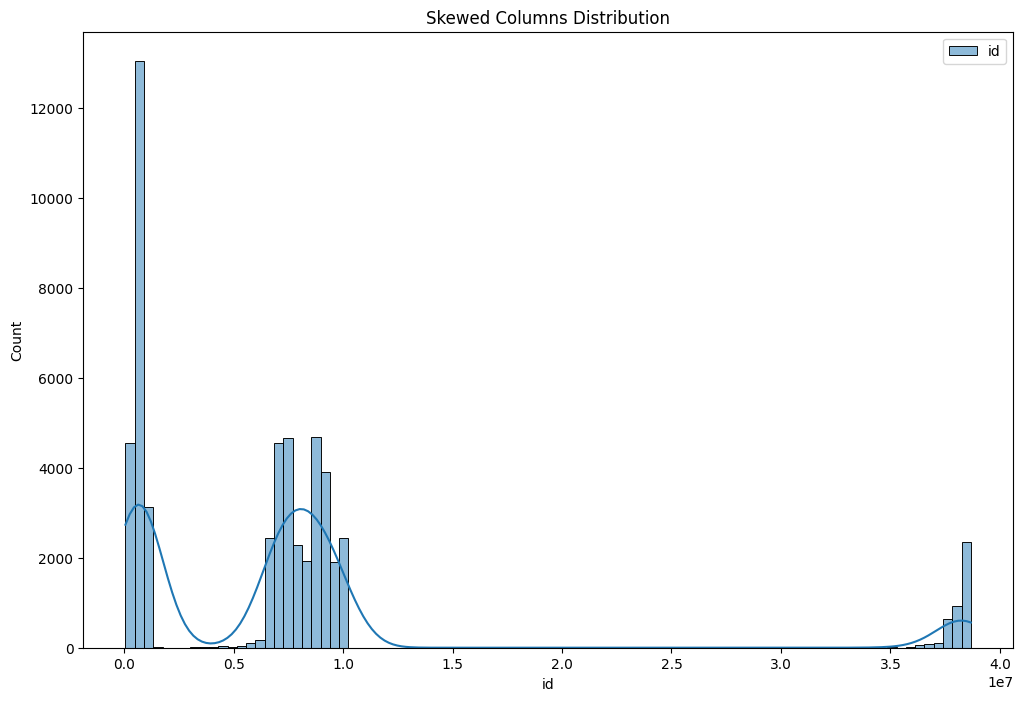

<Figure size 20x10 with 0 Axes>

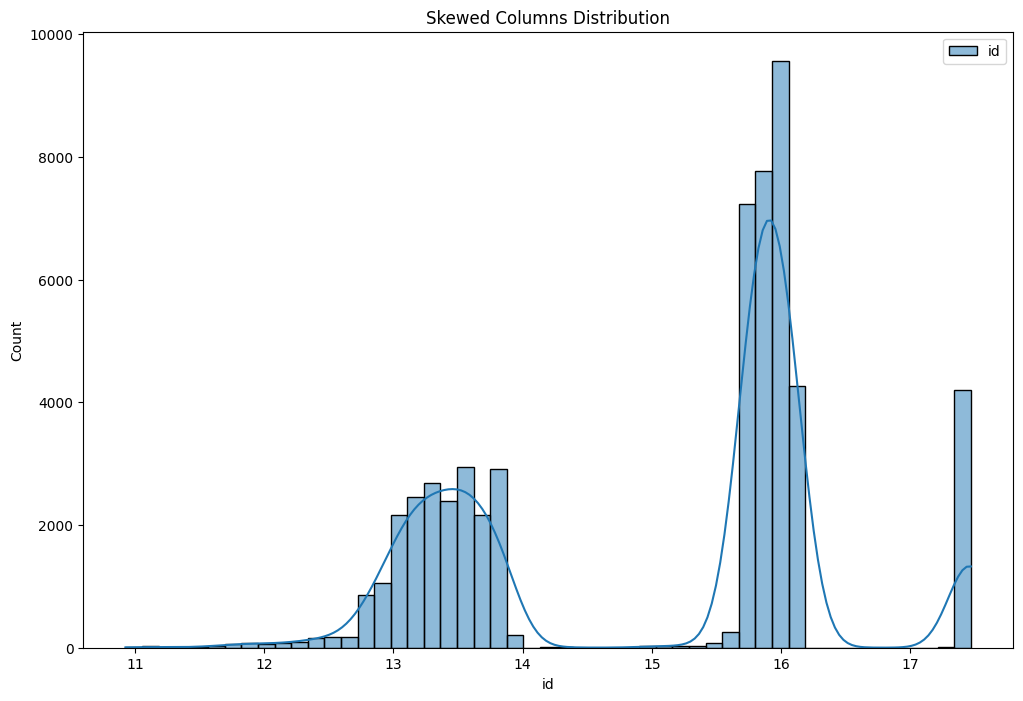

<Figure size 20x10 with 0 Axes>

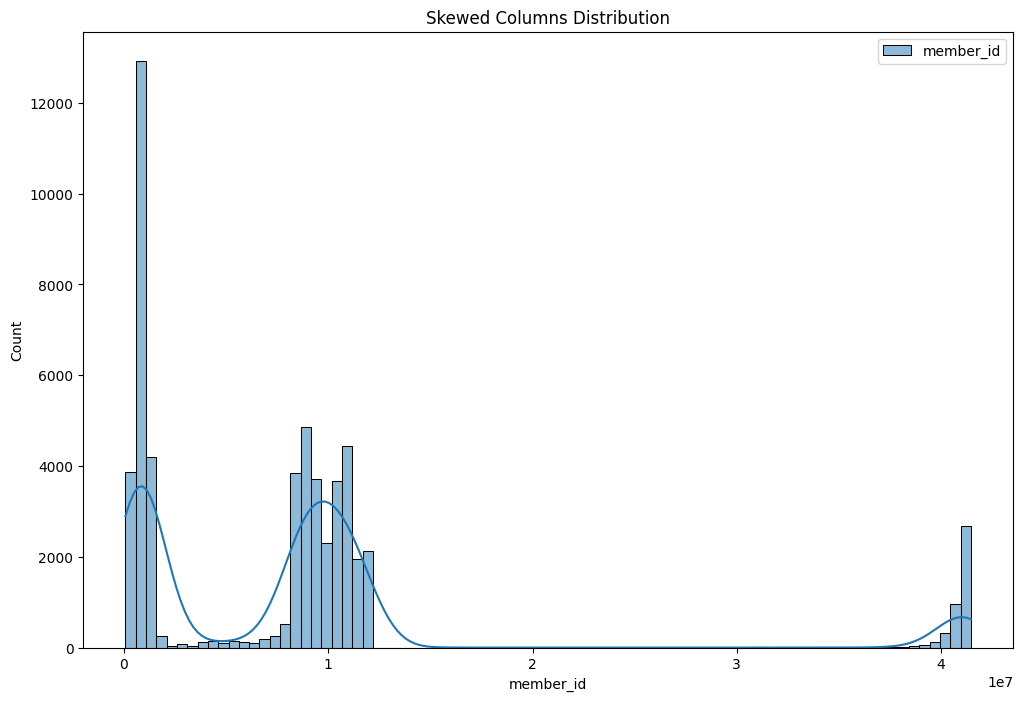

<Figure size 20x10 with 0 Axes>

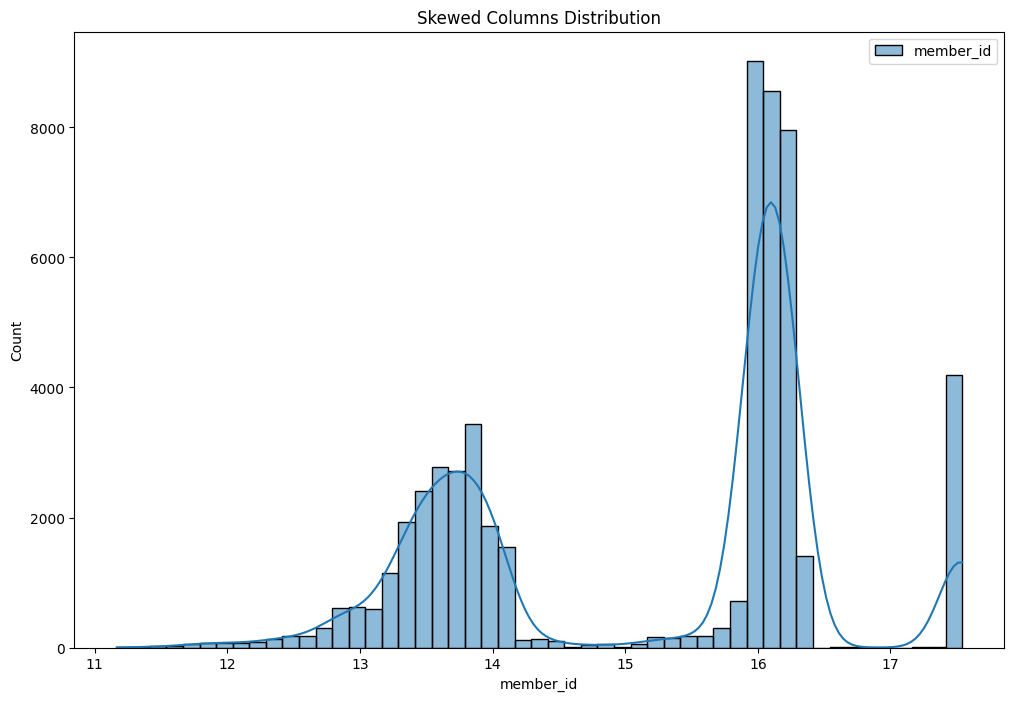

<Figure size 20x10 with 0 Axes>

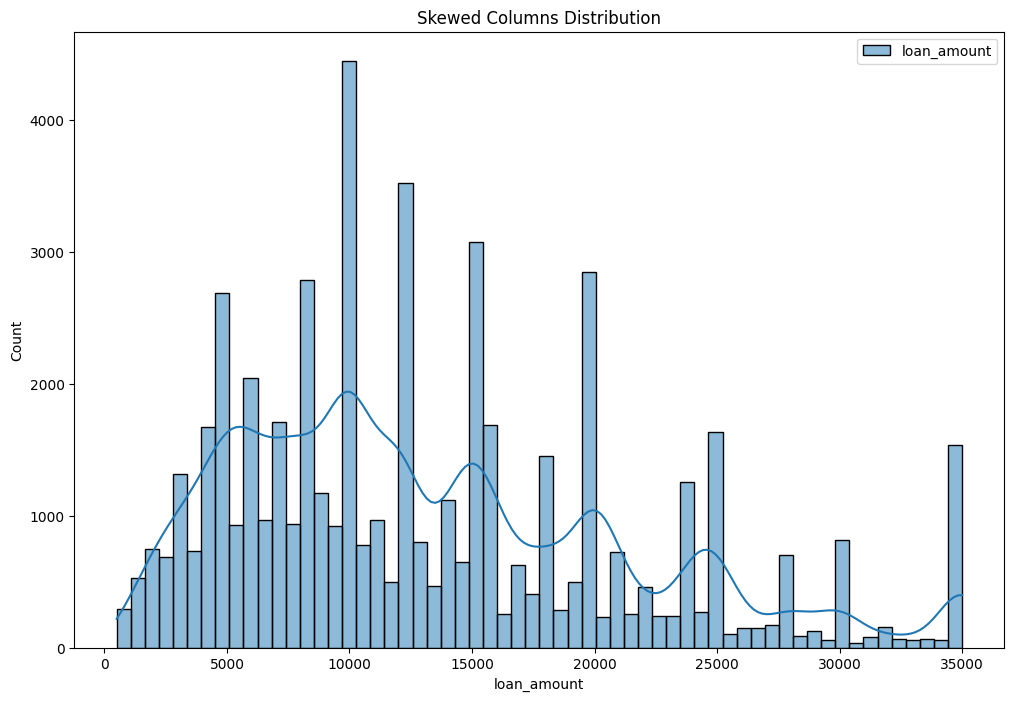

<Figure size 20x10 with 0 Axes>

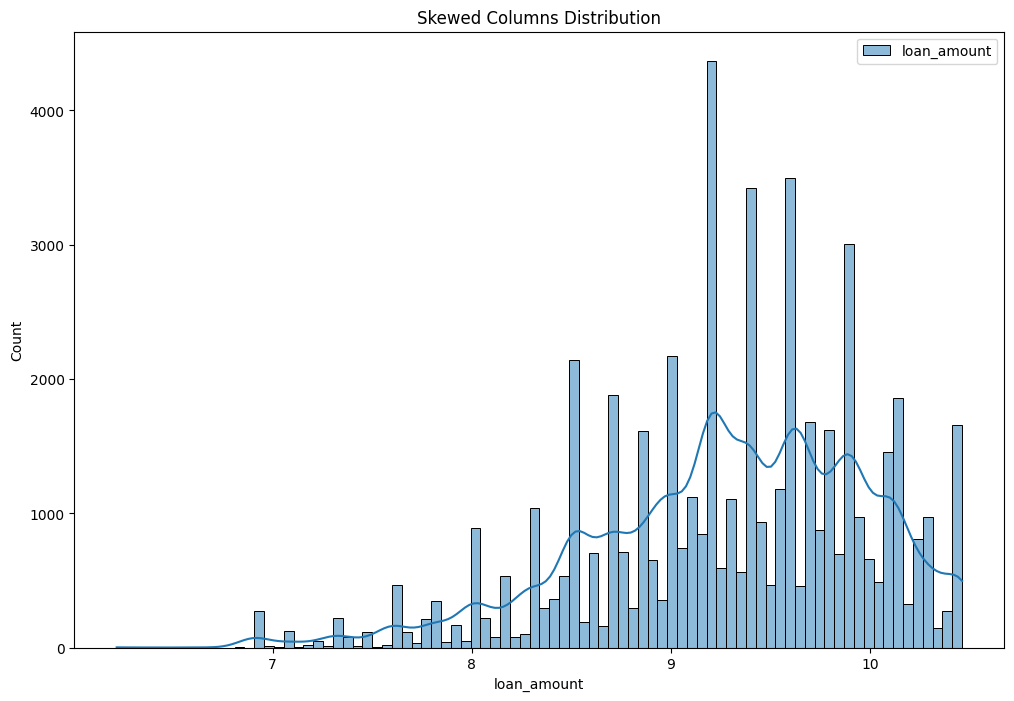

<Figure size 20x10 with 0 Axes>

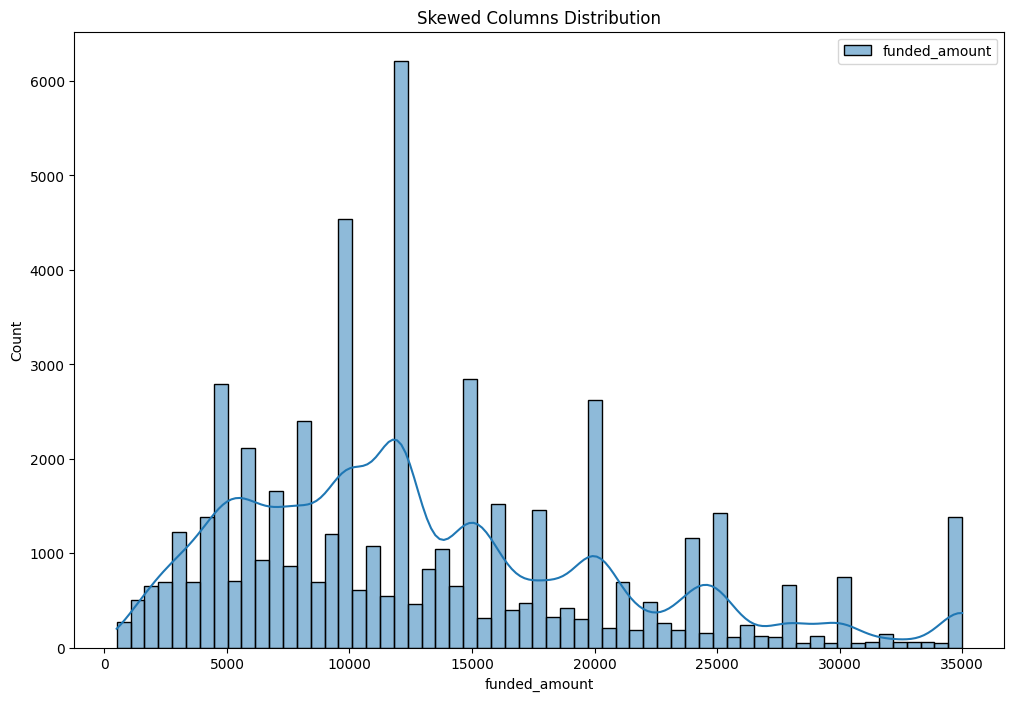

<Figure size 20x10 with 0 Axes>

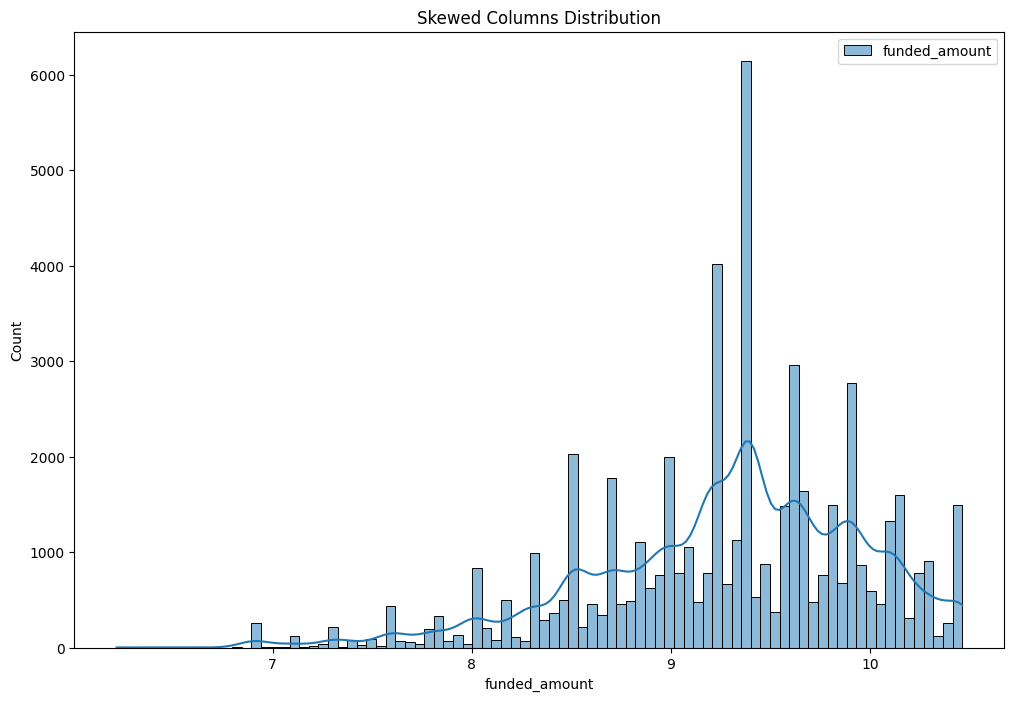

<Figure size 20x10 with 0 Axes>

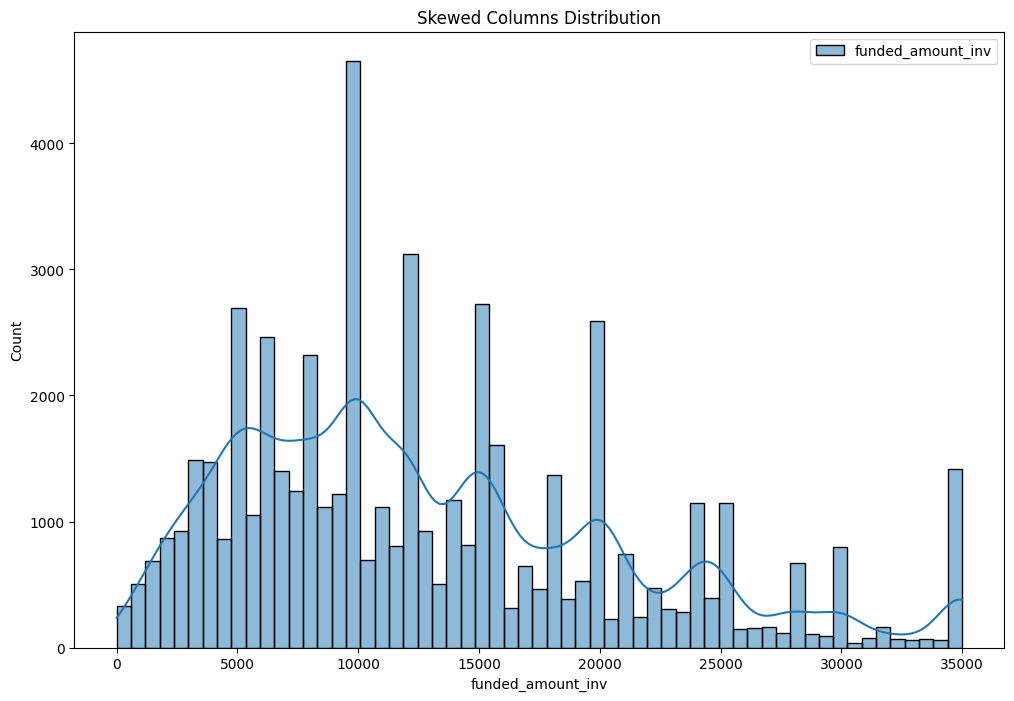

<Figure size 20x10 with 0 Axes>

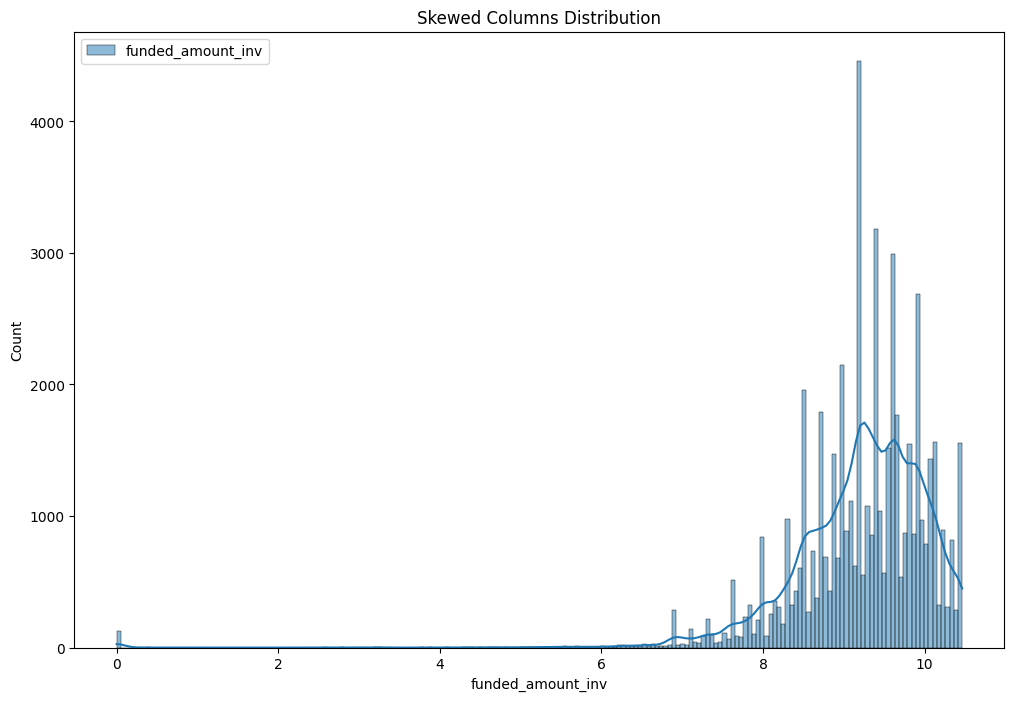

<Figure size 20x10 with 0 Axes>

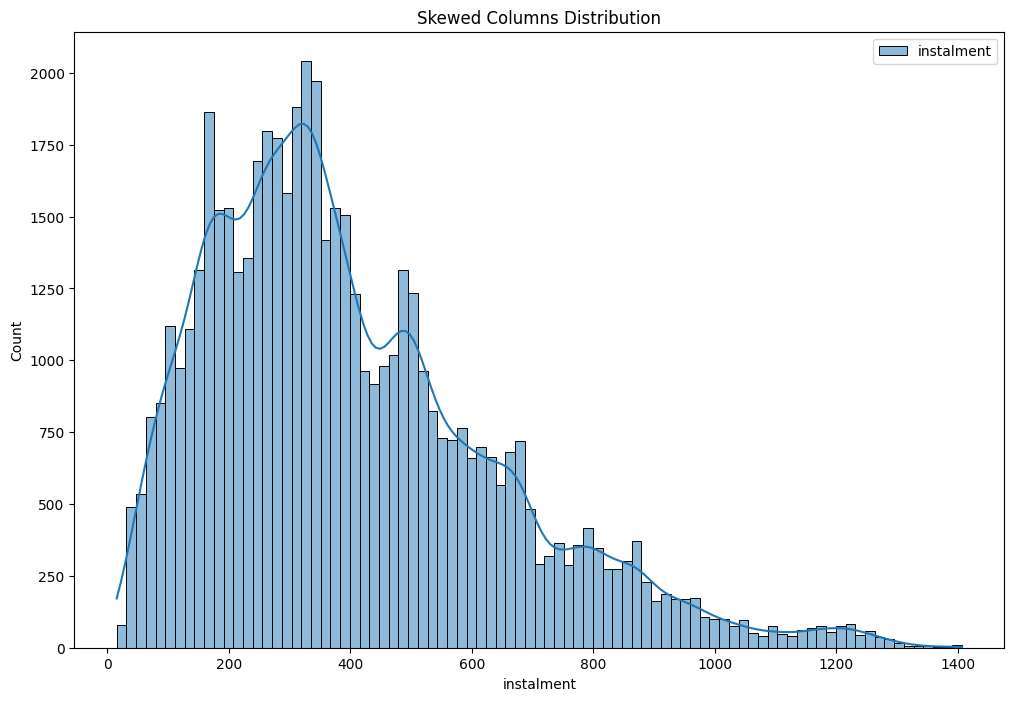

<Figure size 20x10 with 0 Axes>

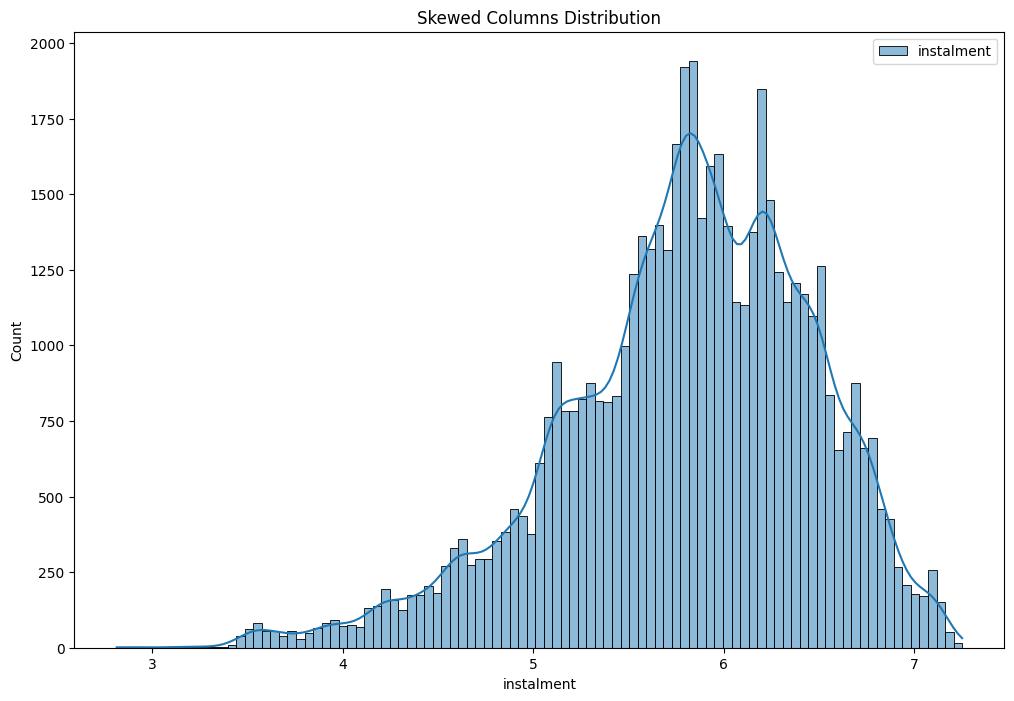

<Figure size 20x10 with 0 Axes>

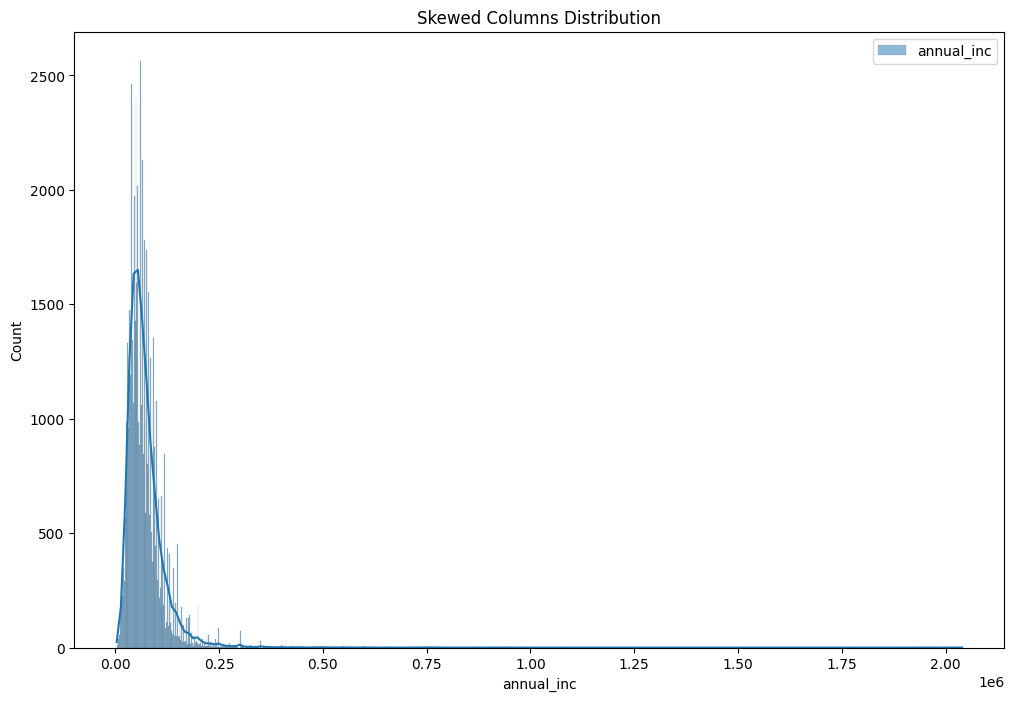

<Figure size 20x10 with 0 Axes>

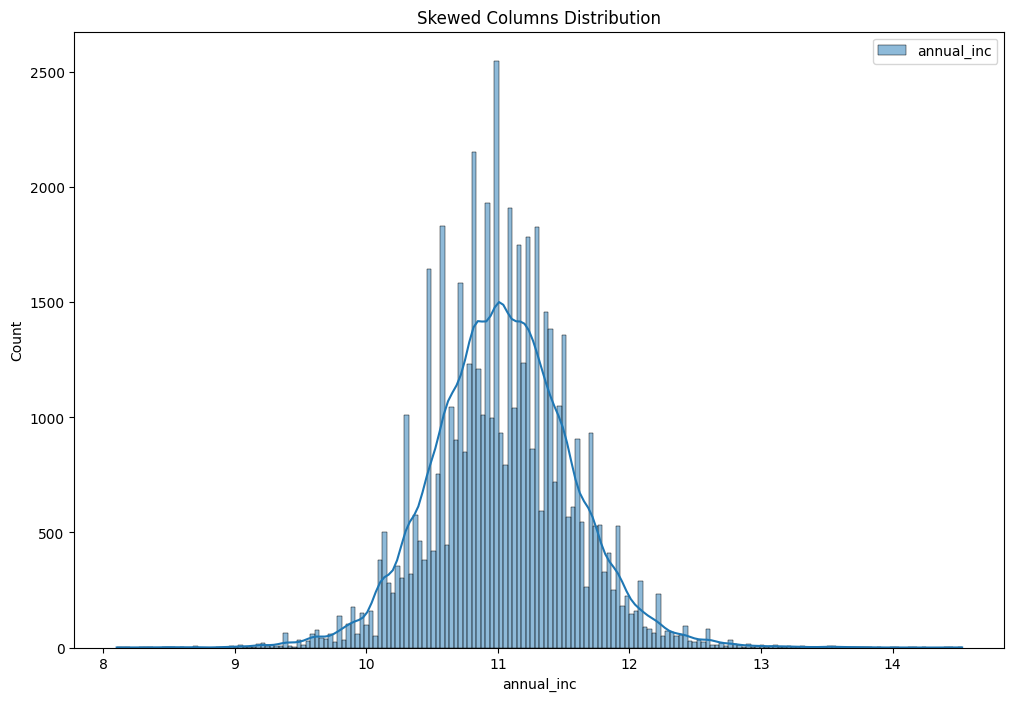

<Figure size 20x10 with 0 Axes>

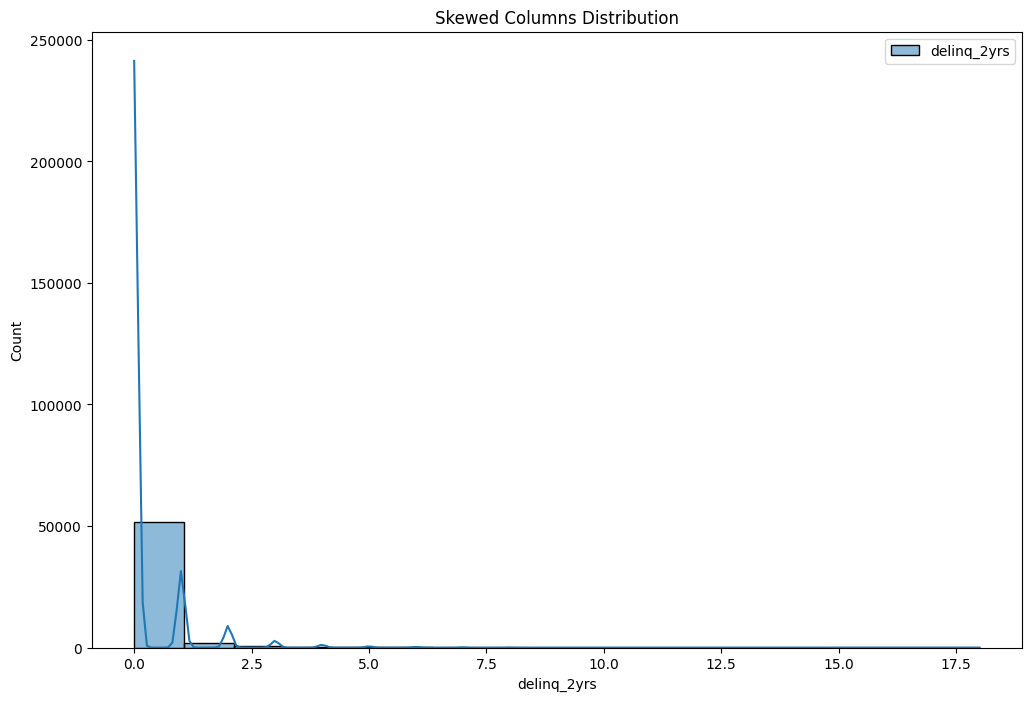

<Figure size 20x10 with 0 Axes>

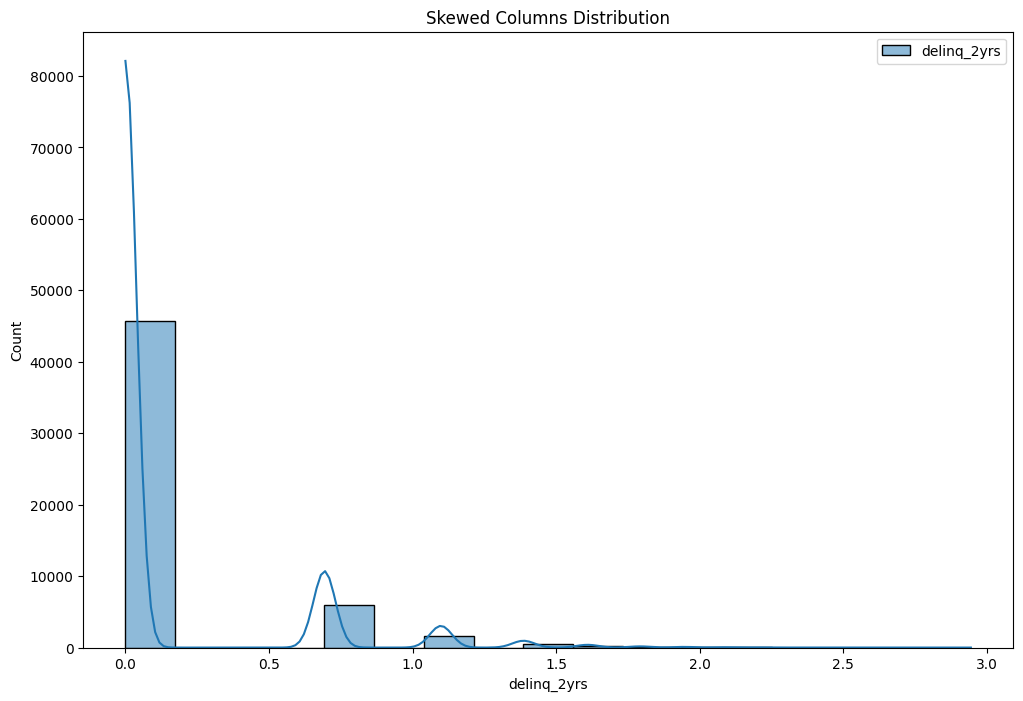

<Figure size 20x10 with 0 Axes>

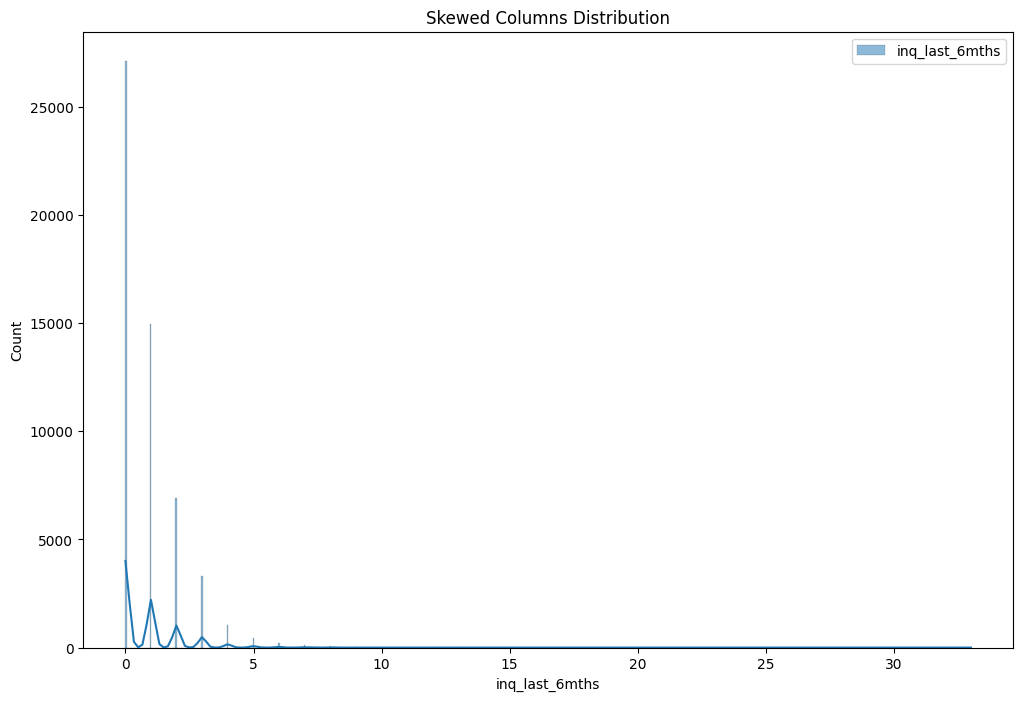

<Figure size 20x10 with 0 Axes>

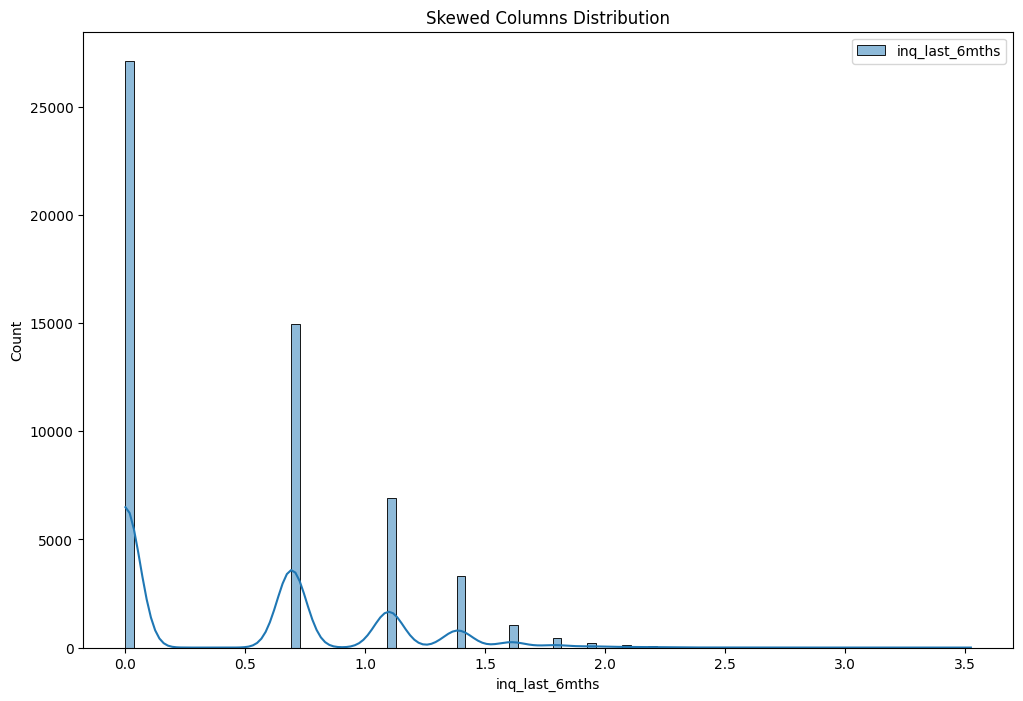

<Figure size 20x10 with 0 Axes>

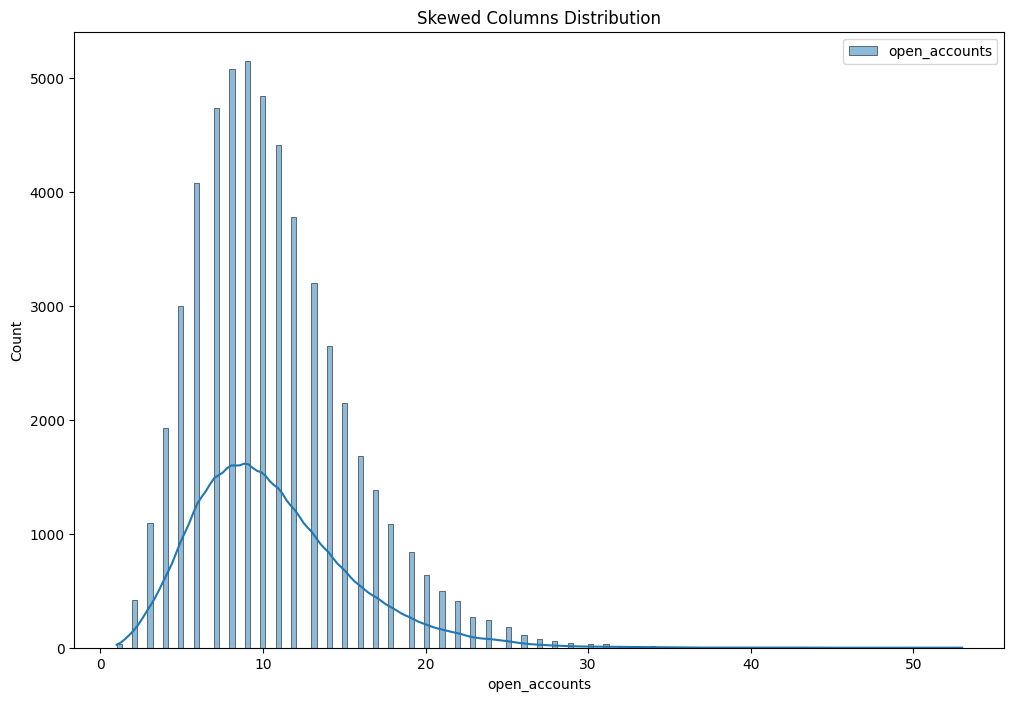

<Figure size 20x10 with 0 Axes>

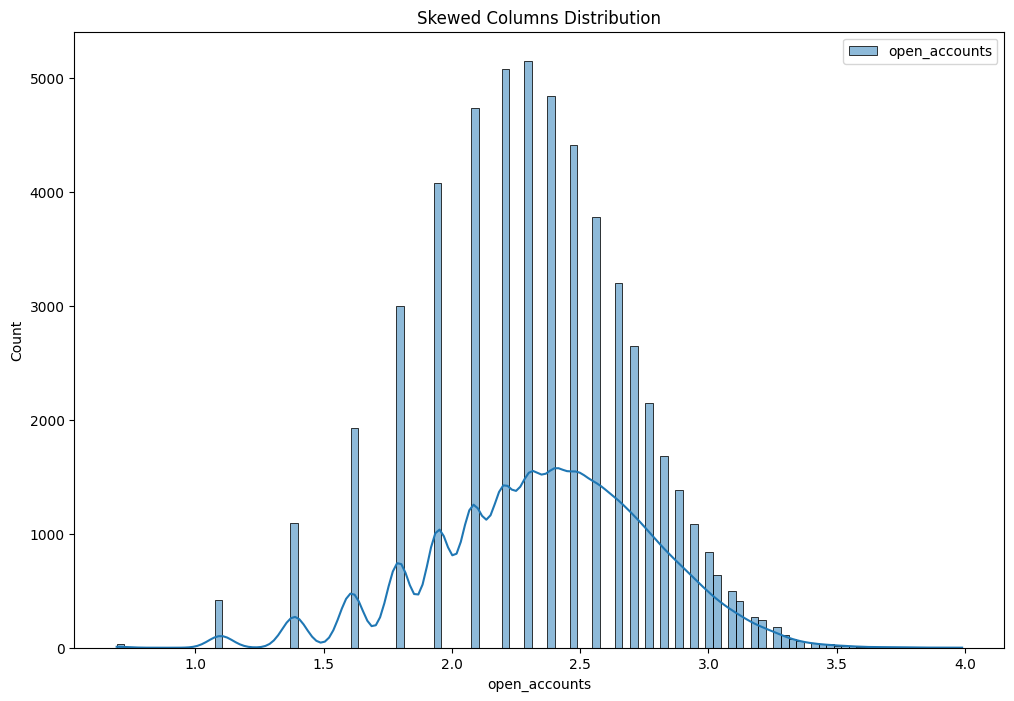

<Figure size 20x10 with 0 Axes>

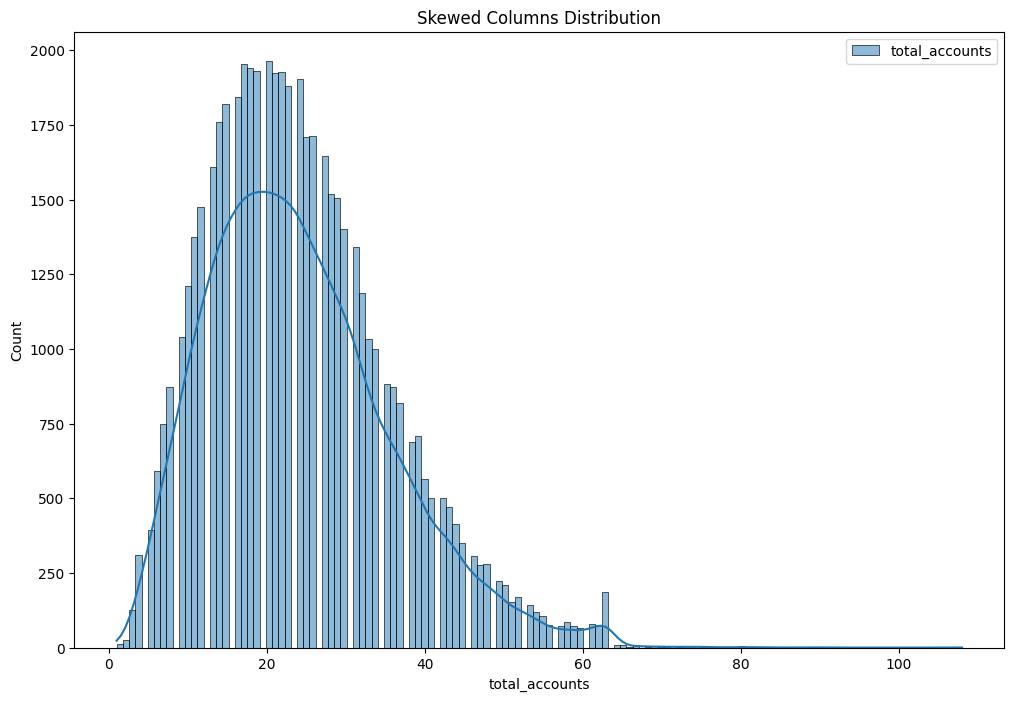

<Figure size 20x10 with 0 Axes>

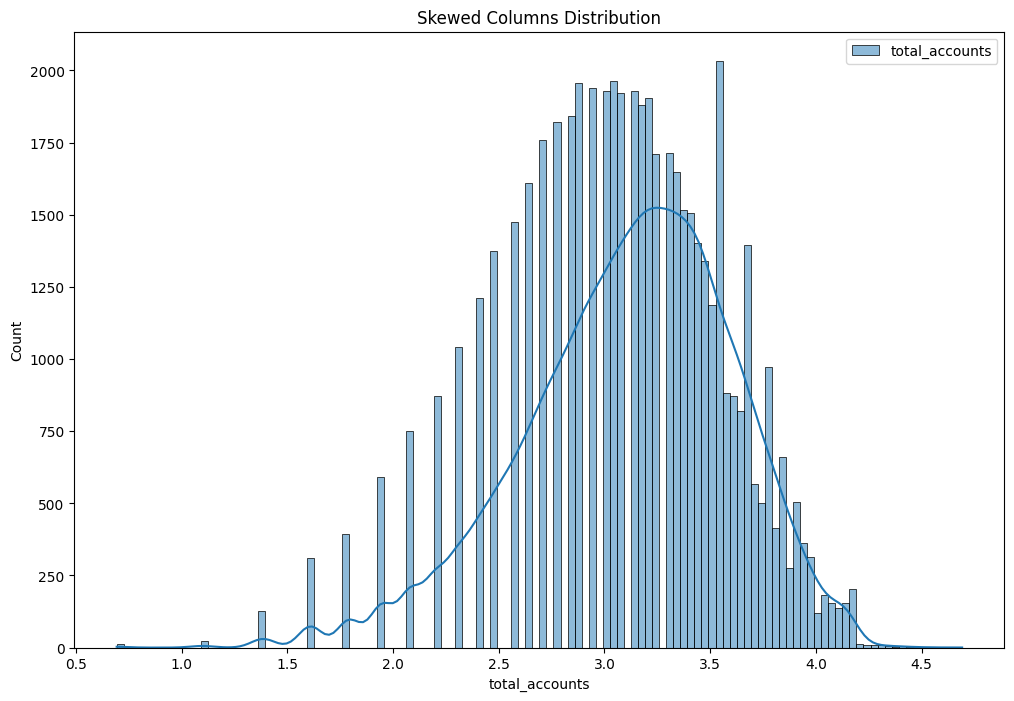

<Figure size 20x10 with 0 Axes>

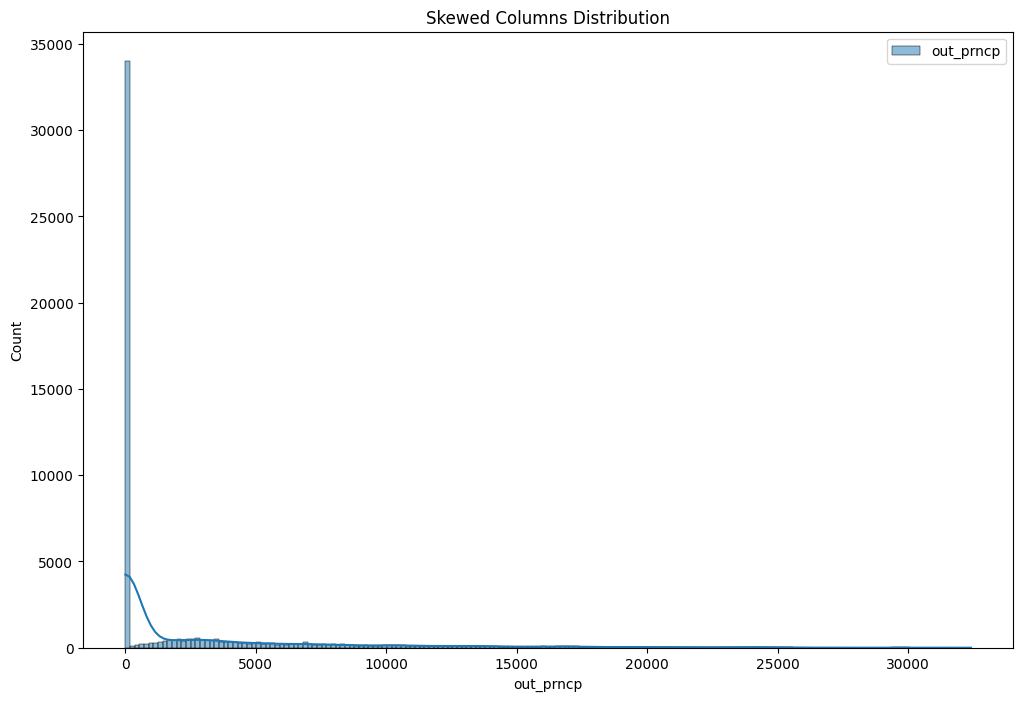

<Figure size 20x10 with 0 Axes>

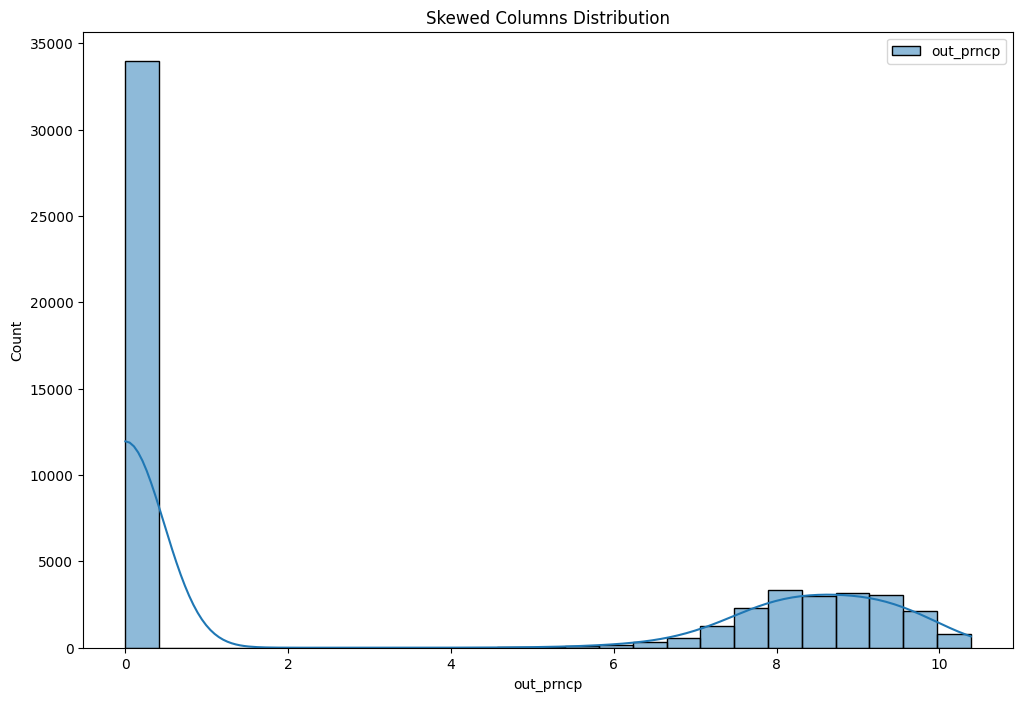

<Figure size 20x10 with 0 Axes>

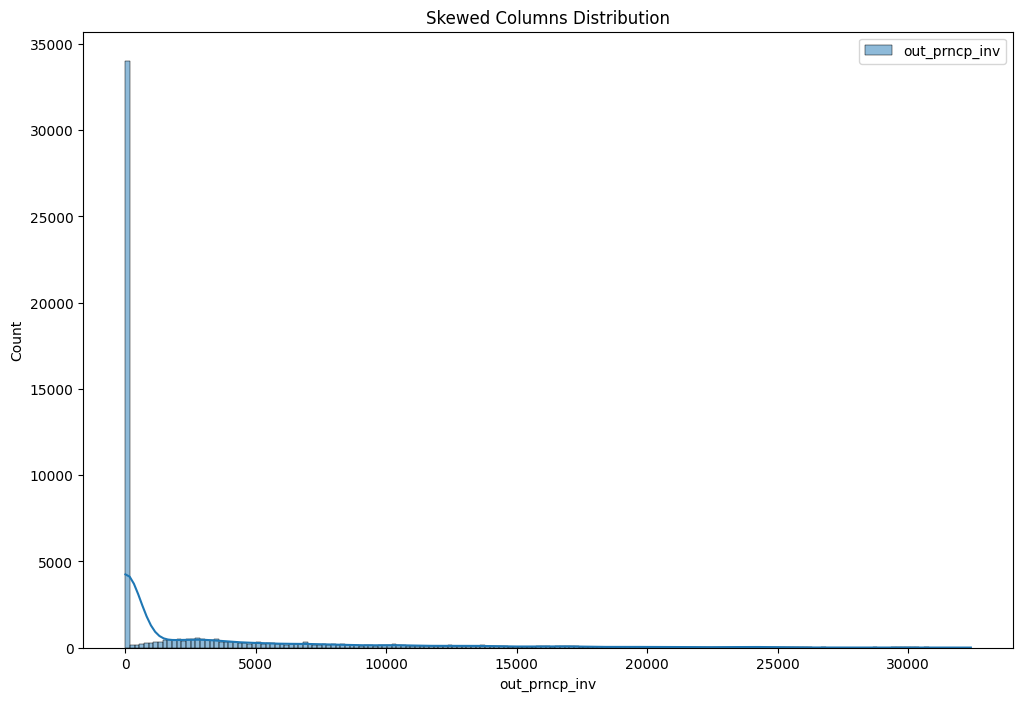

<Figure size 20x10 with 0 Axes>

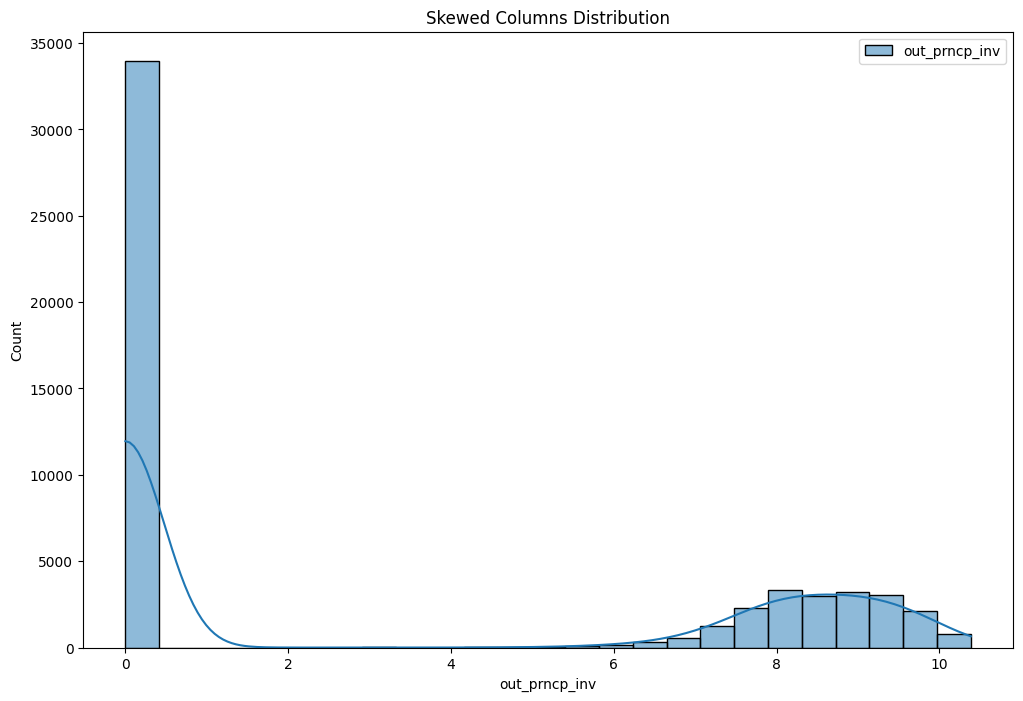

<Figure size 20x10 with 0 Axes>

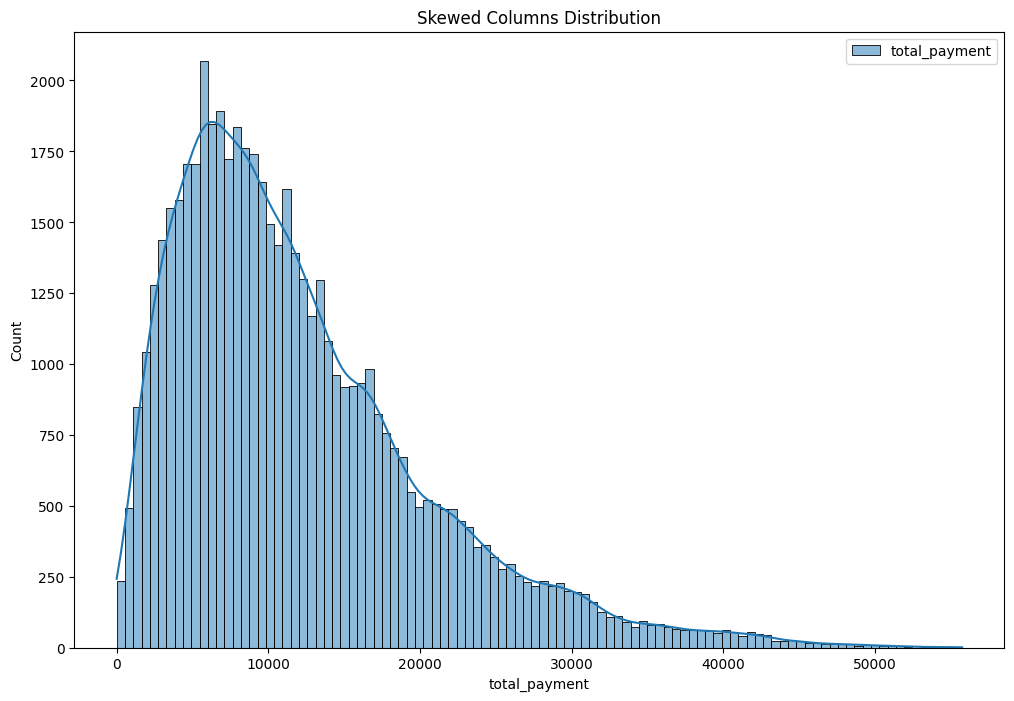

<Figure size 20x10 with 0 Axes>

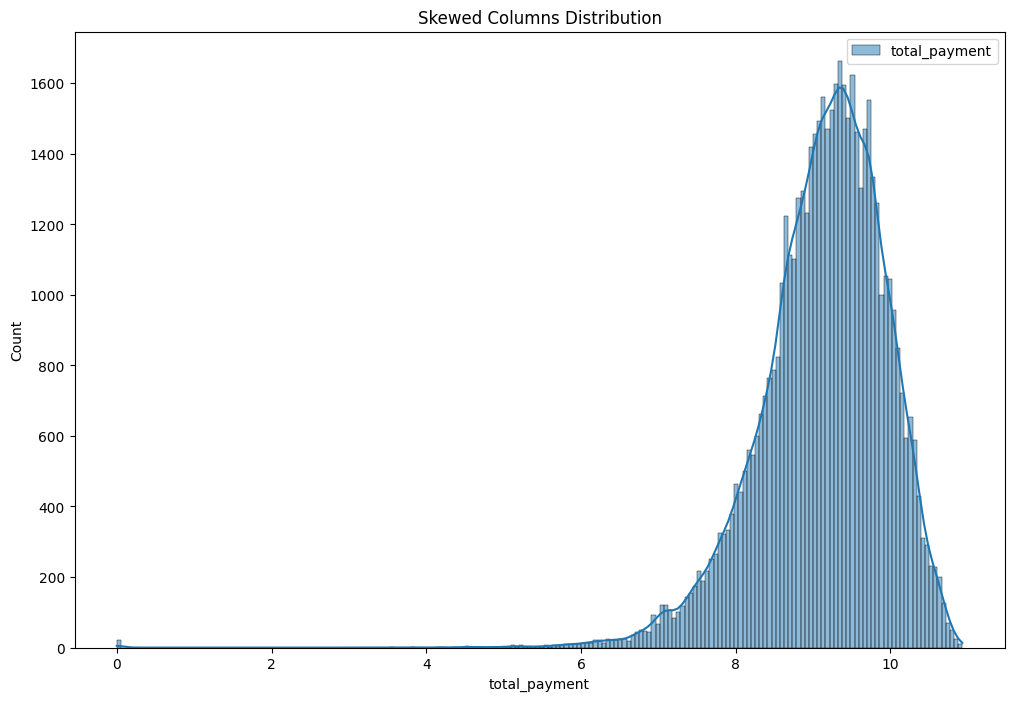

<Figure size 20x10 with 0 Axes>

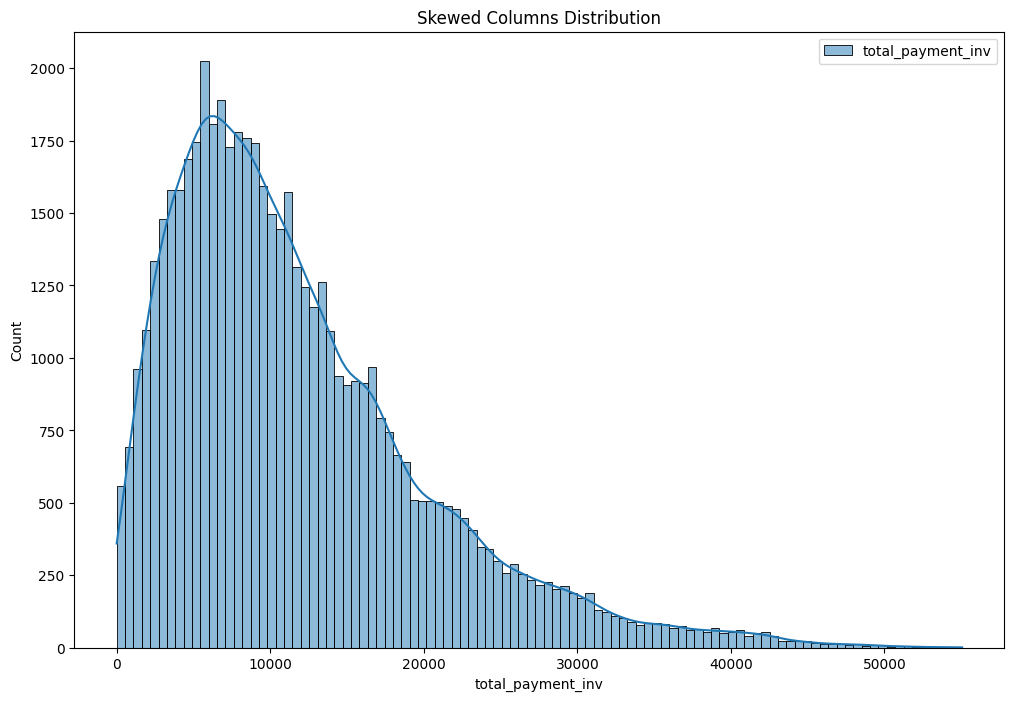

<Figure size 20x10 with 0 Axes>

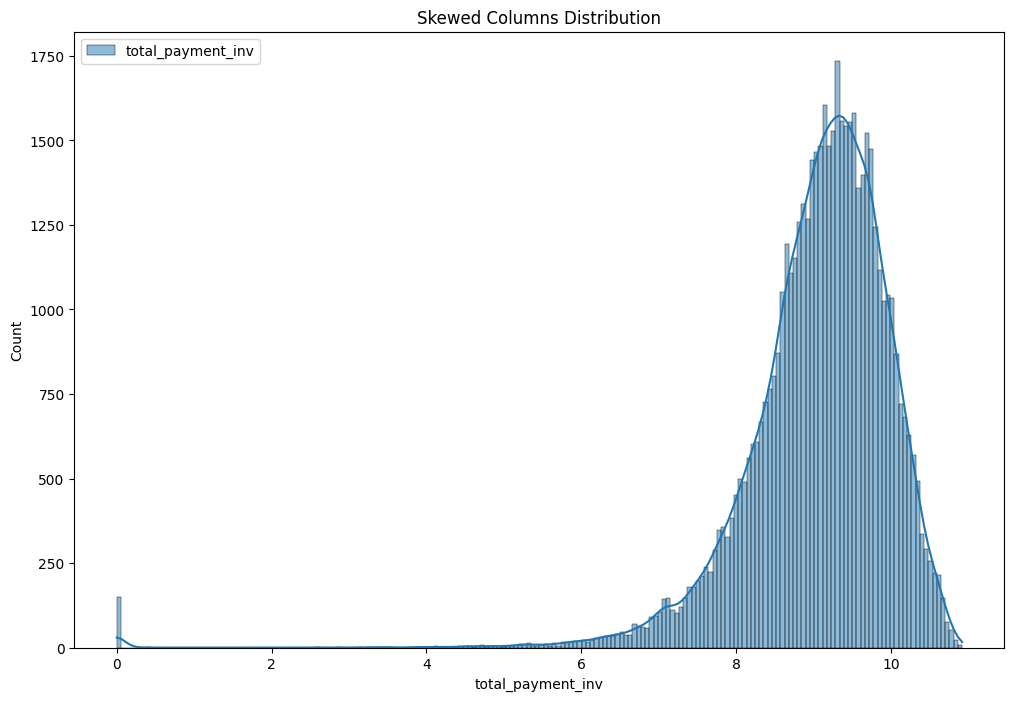

<Figure size 20x10 with 0 Axes>

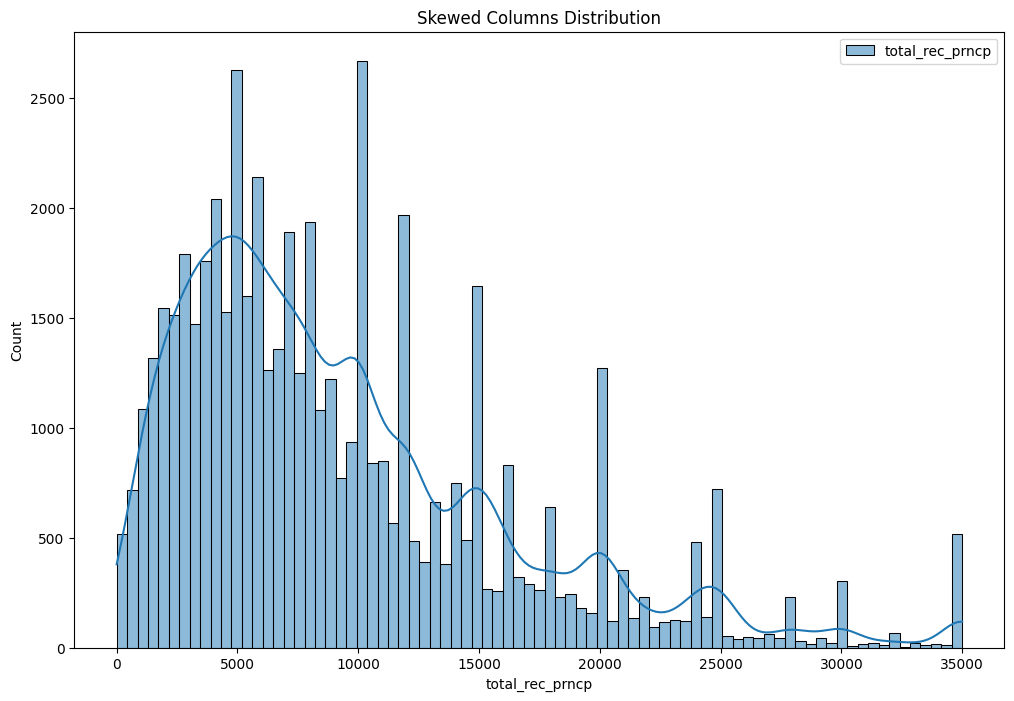

<Figure size 20x10 with 0 Axes>

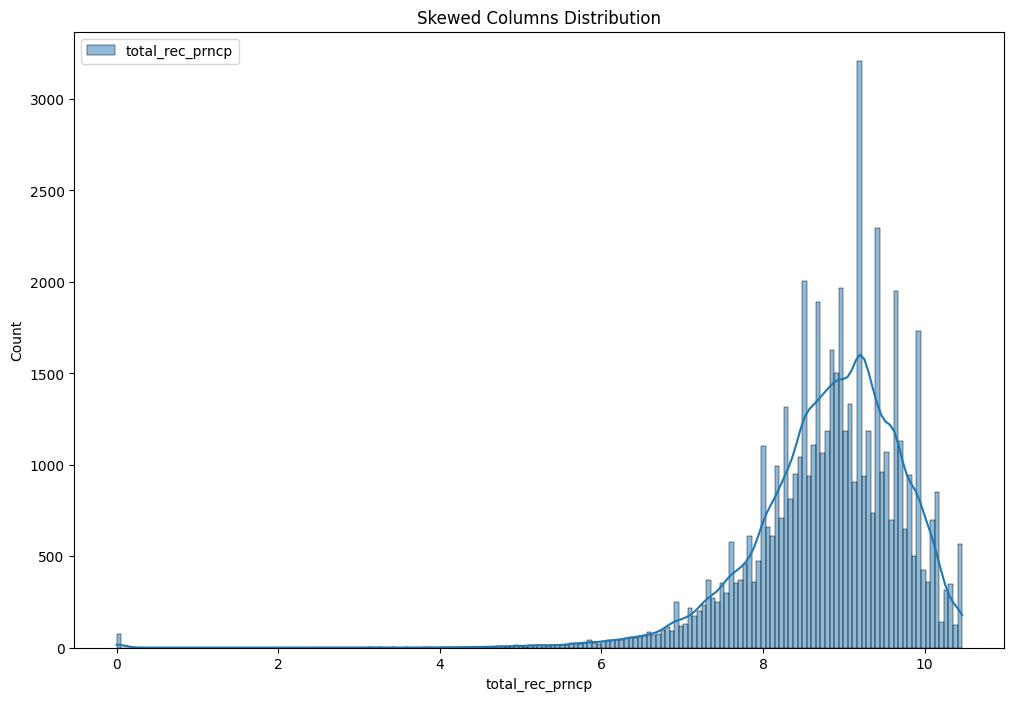

<Figure size 20x10 with 0 Axes>

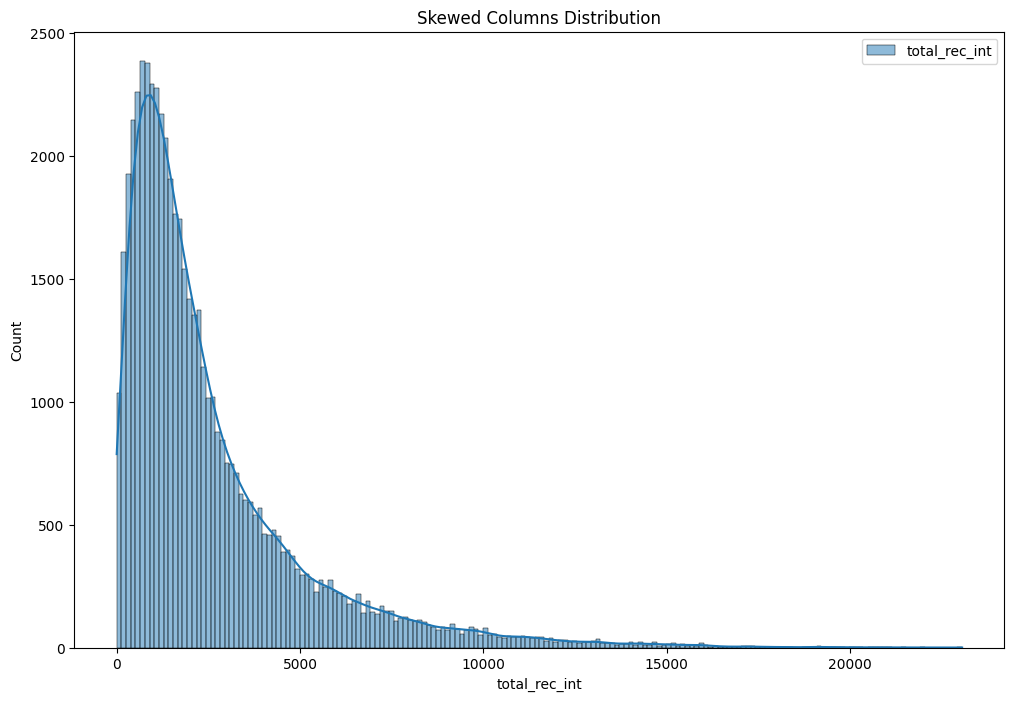

<Figure size 20x10 with 0 Axes>

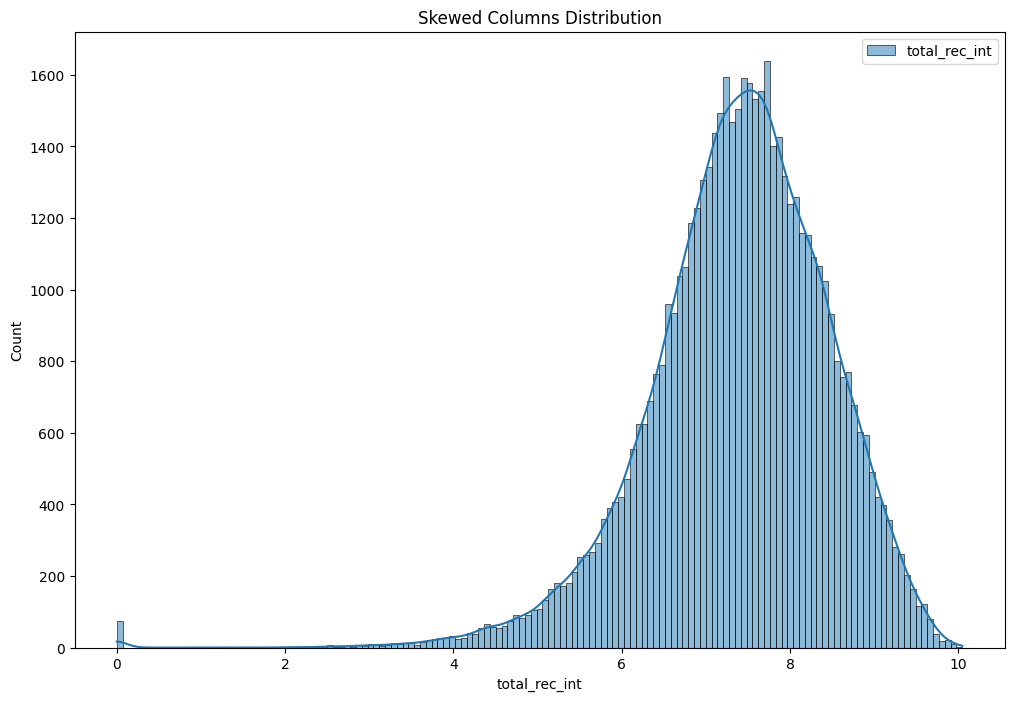

<Figure size 20x10 with 0 Axes>

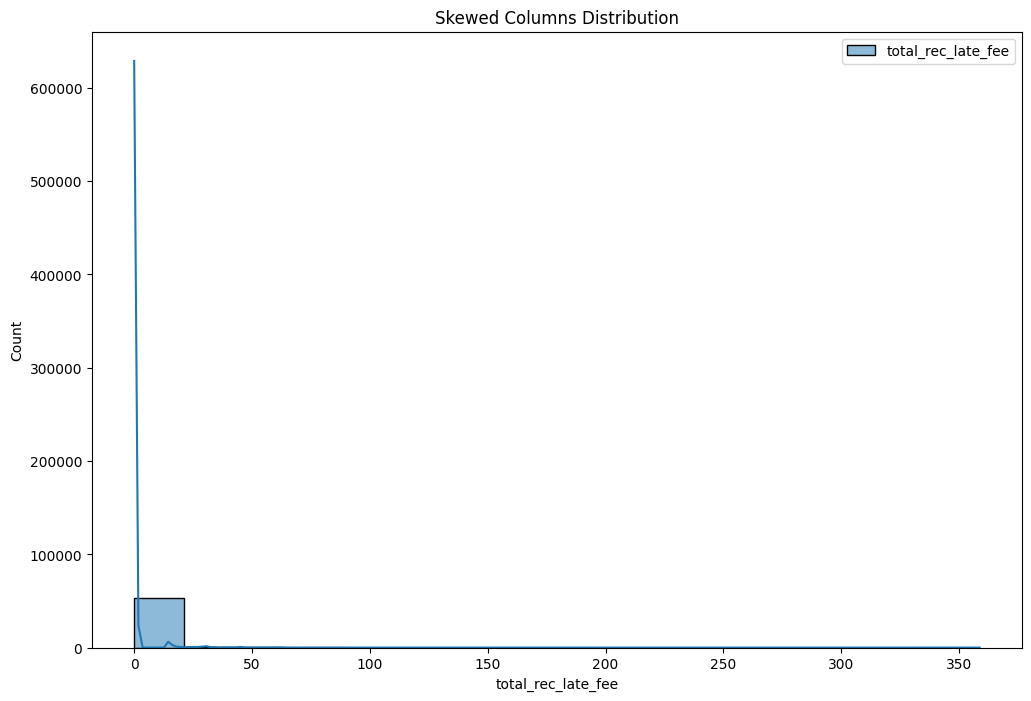

<Figure size 20x10 with 0 Axes>

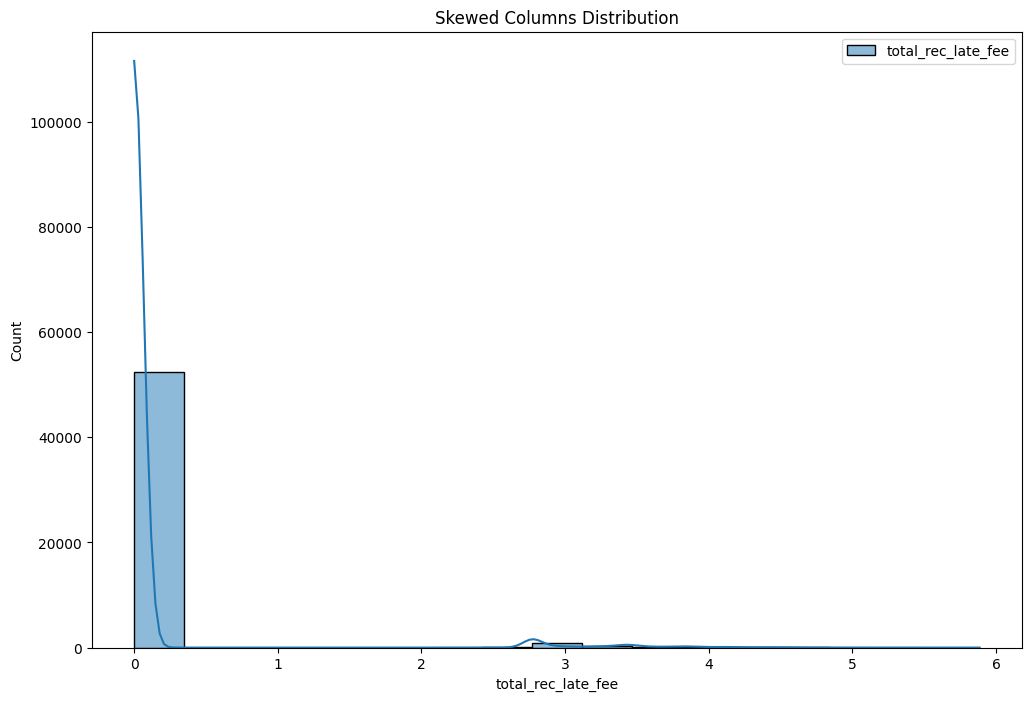

<Figure size 20x10 with 0 Axes>

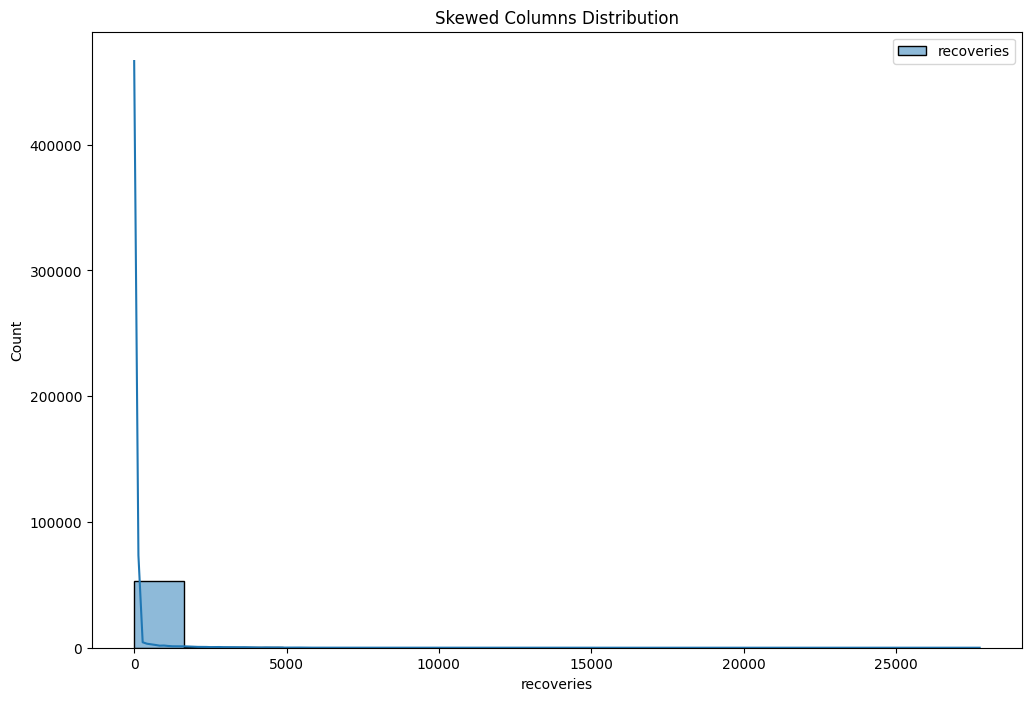

<Figure size 20x10 with 0 Axes>

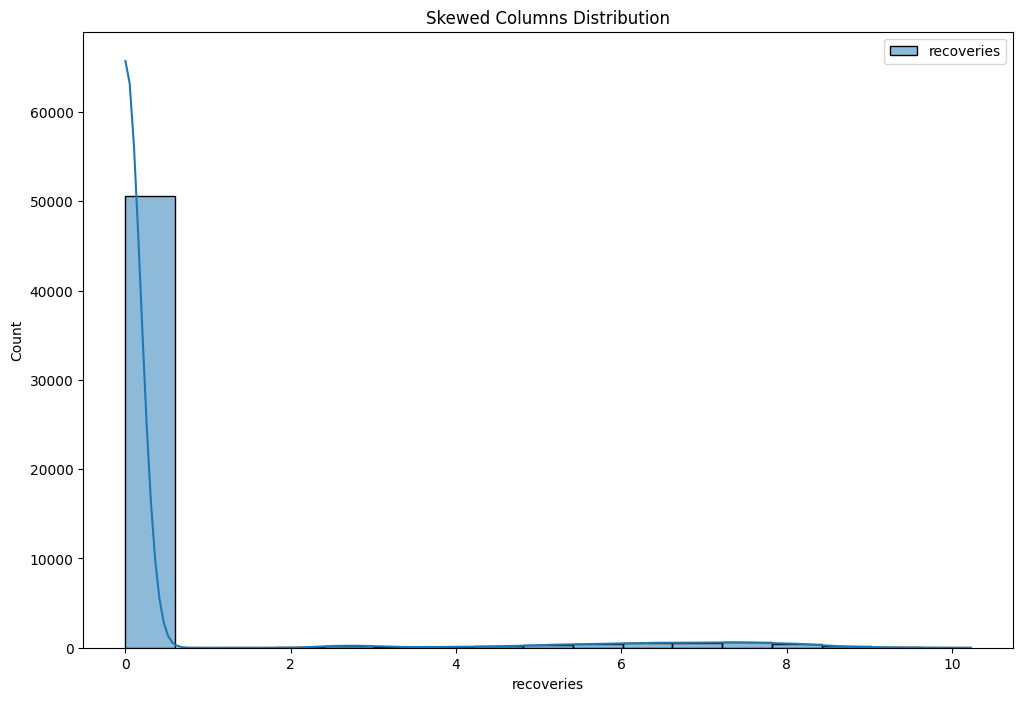

<Figure size 20x10 with 0 Axes>

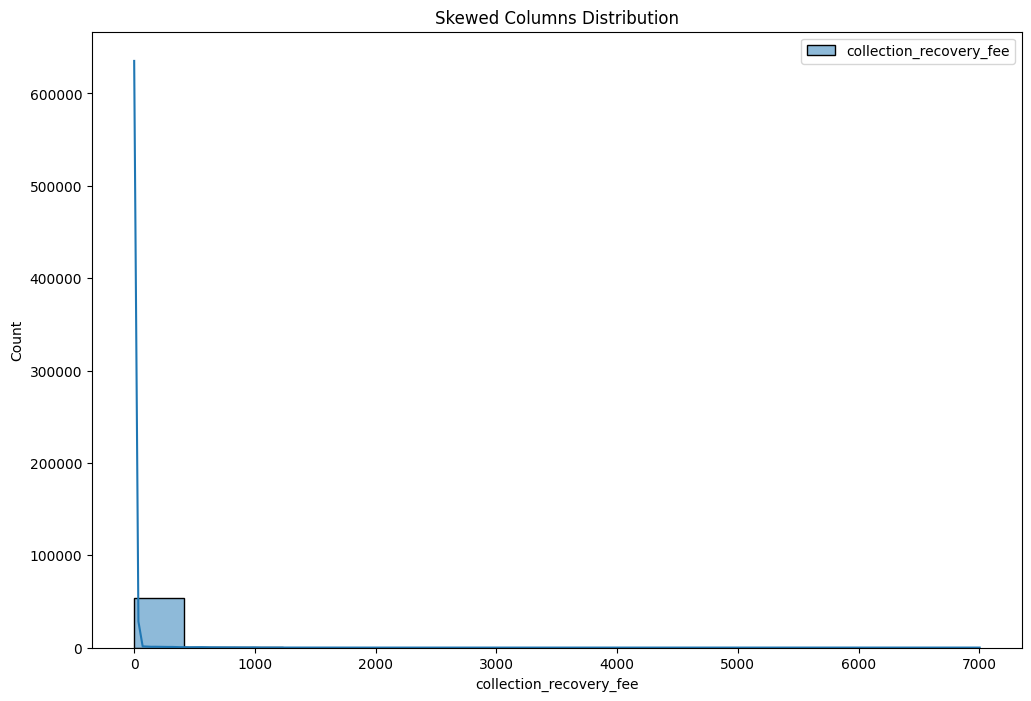

<Figure size 20x10 with 0 Axes>

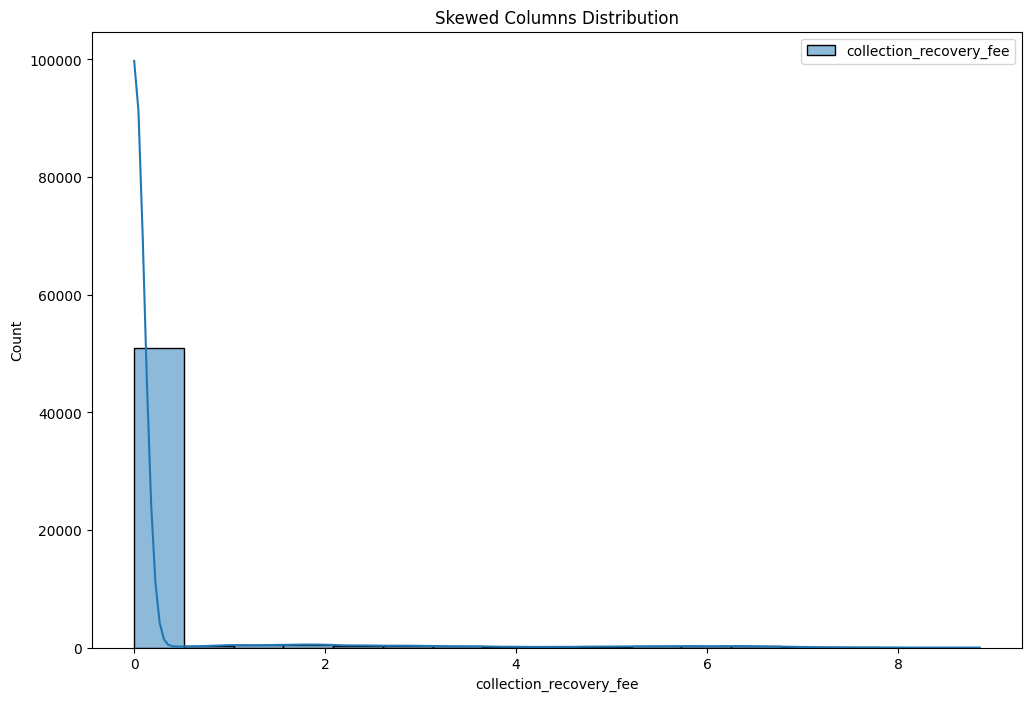

<Figure size 20x10 with 0 Axes>

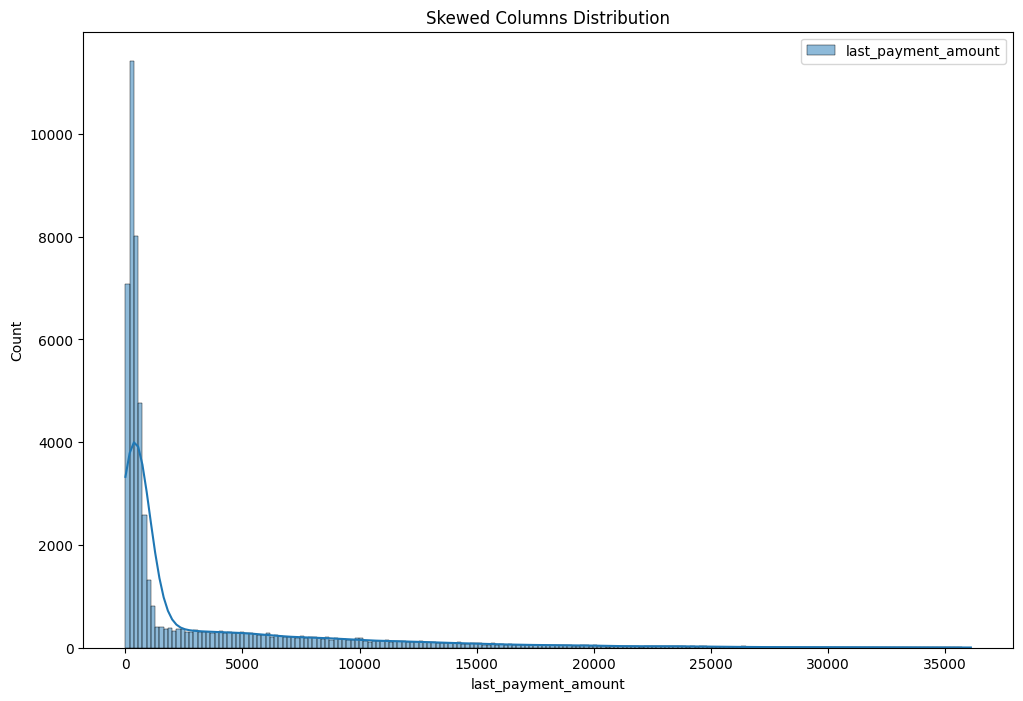

<Figure size 20x10 with 0 Axes>

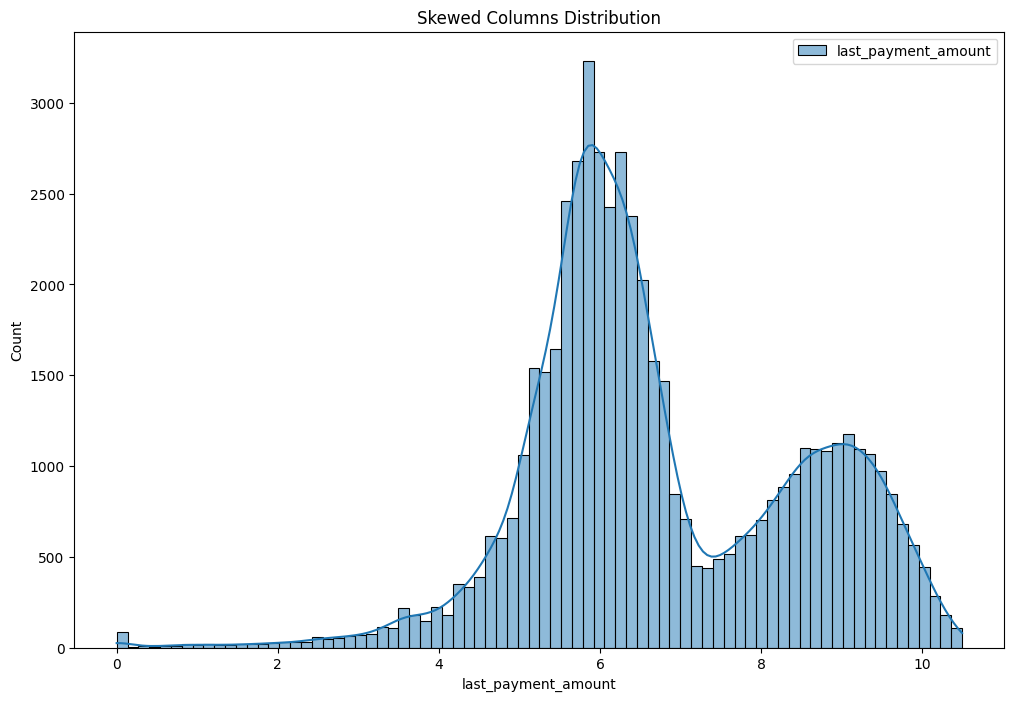

<Figure size 20x10 with 0 Axes>

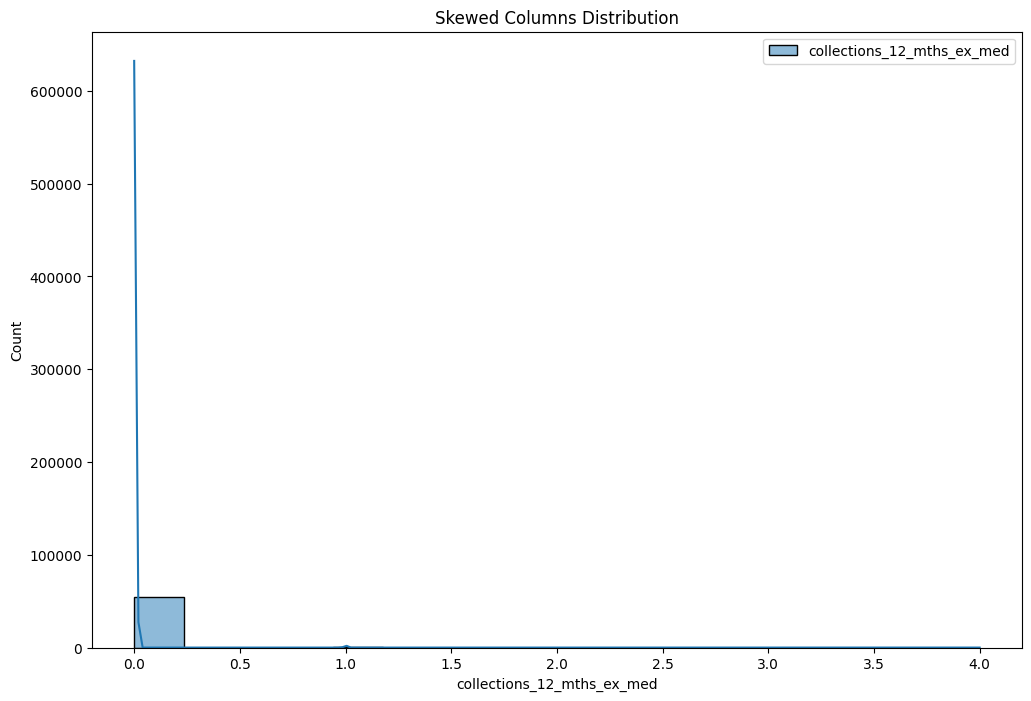

<Figure size 20x10 with 0 Axes>

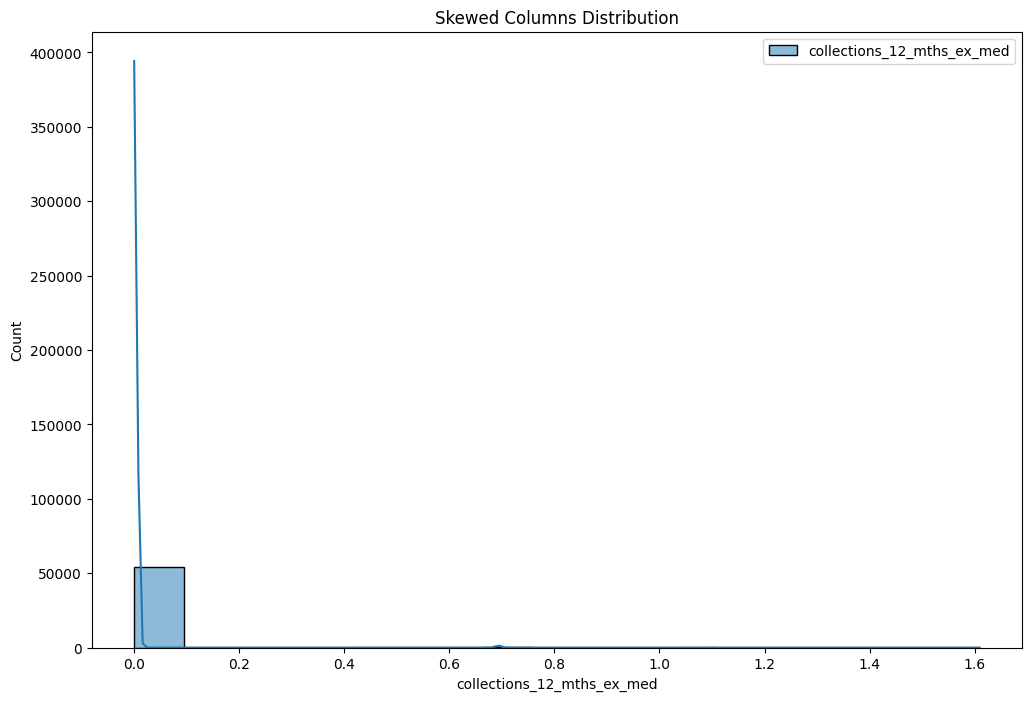

In [5]:
from db_utils import DataFrameTransform, identify_skewed_columns, Plotter
import numpy as np
import matplotlib.pyplot as plt


# Identify skewed columns
skewed_columns = identify_skewed_columns(df)

# Set a common figsize for all plots
figsize = (0.2, 0.1)

# Visualize skewness for each skewed column
for column in skewed_columns:
    # Create a DataFrame with the current column
    single_column_df = df[[column]]
    
    # Visualize skewness for the single column
    plt.figure(figsize=figsize)
    Plotter.visualize_skewness(single_column_df, [column])

    # Transform the single column using the .loc accessor and visualize again
    df.loc[:, column] = np.log1p(df[column])
    transformed_df = df[[column]]
    
    # Visualize skewness for the transformed single column
    plt.figure(figsize=figsize)
    Plotter.visualize_skewness(transformed_df, [column])

# Save the DataFrame after transformations
df.to_csv('transformed_data.csv', index=False)




In [6]:
from db_utils import Plotter

Plotter.qq_plot(df)





KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001BBBCDAC9A0> (for post_execute):


KeyboardInterrupt: 